# PetFinder.my Adoption Prediction
**Author**: Enrique Herreros  
**First version date**: 29/12/2018  
**Description**: A Kernel with an Exploratory Data Analysis to inspect superficially all the data that have been provided to us to predict adoption speed 

**Notes** 
In this competition you will predict the speed at which a pet is adopted, based on the pet’s listing information present on PetFinder.
Sometimes a profile represents a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted.
The data included open text, tabular, image data and results from running Google Vision API. See below for details.
This is a Kernels-only competition.
At the end of the competition, test data will be replaced in their entirety with new data of approximately the same size, and your kernels will be rerun on the new data.

**File descriptions** 
train.csv - Tabular/text data for the training set
test.csv - Tabular/text data for the test set
sample_submission.csv - A sample submission file in the correct format
breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
color_labels.csv - Contains ColorName for each ColorID
state_labels.csv - Contains StateName for each StateID

# Table of contents
1. Libraries and Data loading
* Sneak peek
  * Tabular
  * Images
* Null count
* Duplicates
* Correlation matrix
 * Dogs
 * Cats
* Distribution
 * Univariate
 * Bivariate with target
 * Bivariate between correlated variables
* Base Model
* Submission


# Libraries and Data loading

Libraries loading

In [1]:
import os
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


from IPython.display import display, HTML

Visualization configuration

In [2]:
# Table printing large
plt.rcParams['figure.figsize'] = (15, 7)
pd.set_option("display.max_columns", 400)
pd.options.display.max_colwidth = 250
pd.set_option("display.max_rows", 100)
# High defition plots
%config InlineBackend.figure_format = 'retina'
sns.set()

Global variables

In [3]:
base_path_data = "../input/"
print(os.listdir("../input"))

['breed_labels.csv', 'test', 'train', 'train_metadata', 'test_metadata', 'train_sentiment', 'train_images', 'test_images', 'state_labels.csv', 'color_labels.csv', 'test_sentiment']


Train and test data

In [4]:
df_train = pd.read_csv("../input/train/train.csv")
df_test = pd.read_csv("../input/test/test.csv")

print(f"train.csv shape is {df_train.shape}")
print(f"test.csv shape is {df_test.shape}")

train.csv shape is (14993, 24)
test.csv shape is (3948, 23)


In [5]:
print("Basic statistics of the train set")
display(df_train.describe(include="all").T)

print("Basic statistics of the test set")
display(df_test.describe(include="all").T)

Basic statistics of the train set


count unique                               top freq       mean  \
Type           14993    NaN                               NaN  NaN    1.45761   
Name           13736   9060                              Baby   66        NaN   
Age            14993    NaN                               NaN  NaN    10.4521   
Breed1         14993    NaN                               NaN  NaN    265.273   
Breed2         14993    NaN                               NaN  NaN    74.0097   
Gender         14993    NaN                               NaN  NaN    1.77616   
Color1         14993    NaN                               NaN  NaN    2.23418   
Color2         14993    NaN                               NaN  NaN    3.22284   
Color3         14993    NaN                               NaN  NaN    1.88201   
MaturitySize   14993    NaN                               NaN  NaN      1.862   
FurLength      14993    NaN                               NaN  NaN    1.46748   
Vaccinated     14993    NaN                               NaN  NaN    1.73121   
Dewormed       14993    NaN                               NaN  NaN    1.55873   
Sterilized     14993    NaN                               NaN  NaN    1.91423   
Health         14993    NaN                               NaN  NaN    1.03662   
Quantity       14993    NaN                               NaN  NaN    1.57607   
Fee            14993    NaN                               NaN  NaN      21.26   
State          14993    NaN                               NaN  NaN      41346   
RescuerID      14993   5595  fa90fa5b1ee11c86938398b60abc32cb  459        NaN   
VideoAmt       14993    NaN                               NaN  NaN  0.0567598   
Description    14981  14032                      For Adoption  164        NaN   
PetID          14993  14993                         21c3157e8    1        NaN   
PhotoAmt       14993    NaN                               NaN  NaN    3.88921   
AdoptionSpeed  14993    NaN                               NaN  NaN    2.51644   

                    std    min    25%    50%    75%    max  
Type           0.498217      1      1      1      2      2  
Name                NaN    NaN    NaN    NaN    NaN    NaN  
Age             18.1558      0      2      3     12    255  
Breed1          60.0568      0    265    266    307    307  
Breed2          123.012      0      0      0    179    307  
Gender         0.681592      1      1      2      2      3  
Color1          1.74523      1      1      2      3      7  
Color2          2.74256      0      0      2      6      7  
Color3          2.98409      0      0      0      5      7  
MaturitySize   0.547959      1      2      2      2      4  
FurLength       0.59907      1      1      1      2      3  
Vaccinated     0.667649      1      1      2      2      3  
Dewormed       0.695817      1      1      1      2      3  
Sterilized     0.566172      1      2      2      2      3  
Health         0.199535      1      1      1      1      3  
Quantity        1.47248      1      1      1      1     20  
Fee             78.4145      0      0      0      0   3000  
State           32.4442  41324  41326  41326  41401  41415  
RescuerID           NaN    NaN    NaN    NaN    NaN    NaN  
VideoAmt       0.346185      0      0      0      0      8  
Description         NaN    NaN    NaN    NaN    NaN    NaN  
PetID               NaN    NaN    NaN    NaN    NaN    NaN  
PhotoAmt        3.48781      0      2      3      5     30  
AdoptionSpeed   1.17726      0      2      2      4      4

Basic statistics of the test set


count unique  \
Type          3948    NaN   
Name          3645   2855   
Age           3948    NaN   
Breed1        3948    NaN   
Breed2        3948    NaN   
Gender        3948    NaN   
Color1        3948    NaN   
Color2        3948    NaN   
Color3        3948    NaN   
MaturitySize  3948    NaN   
FurLength     3948    NaN   
Vaccinated    3948    NaN   
Dewormed      3948    NaN   
Sterilized    3948    NaN   
Health        3948    NaN   
Quantity      3948    NaN   
Fee           3948    NaN   
State         3948    NaN   
RescuerID     3948   1518   
VideoAmt      3948    NaN   
Description   3946   3765   
PetID         3948   3948   
PhotoAmt      3948    NaN   

                                                                                                                                                                                                                                                                    top  \
Type                                                                                                                                                                                                                                                                NaN   
Name                                                                                                                                                                                                                                                            Brownie   
Age                                                                                                                                                                                                                                                                 NaN   
Breed1                                                                                                                                                                                                                                                              NaN   
Breed2                                                                                                                                                                                                                                                              NaN   
Gender                                                                                                                                                                                                                                                              NaN   
Color1                                                                                                                                                                                                                                                              NaN   
Color2                                                                                                                                                                                                                                                              NaN   
Color3                                                                                                                                                                                                                                                              NaN   
MaturitySize                                                                                                                                                                                                                                                        NaN   
FurLength                                                                                                                                                                                                                                                           NaN   
Vaccinated                                                                                                      

# Sneak peek

## Tabular

Main data set

In [6]:
df_train.sample(3)

Type                                 Name  Age  Breed1  Breed2  Gender  \
14523     2                              Baby CC    1     265       0       2   
434       1                                Sonia   72     103       0       2   
4379      1  Chi-yaya (Min. Pin Mix Small Breed)    2     152     307       1   

       Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  \
14523       1       7       0             1          1           2         2   
434         1       2       3             3          3           1         1   
4379        1       2       0             1          1           3         1   

       Sterilized  Health  Quantity  Fee  State  \
14523           2       1         1    0  41326   
434             2       1         1    0  41330   
4379            2       1         1    0  41401   

                              RescuerID  VideoAmt  \
14523  897ec1321c30f8d7f95e7f1dc04fa53c         0   
434    2fb7d7718f9c7704ab9ae80d95f56597         0   
4379   c00756f2bdd8fa88fc9f07a8309f7d5d         0   

                                                                                                                                                                                                                                                     Description  \
14523  I found baby near a supermarket, wondering around alone. So we decided to foster her until we can found her a really nice home. thus, we really need to find her a good home since we cant afford to take care another kitten. :( Well anyway, she's c...   
434    This female German Shepherd (SONIA) is now for adoption. Her adopter's own female German dog doesn't go along with SONIA, so he got no choice but to find another loving home for her. I hope anyone of you would give her another loving home. She ha...   
4379   These 4 puppies were abandoned at the nearby stalls in Klang. Not sure of their background but they are 2 months old and will grow small size below 10kg at full grown. Miniature pinscher mixed.. and miniature pinscher can be quite yappy so not re...   

           PetID  PhotoAmt  AdoptionSpeed  
14523  4248ee26d       3.0              3  
434    76d5726c4       4.0              1  
4379   c02ce1bc0       6.0              3

Breed, colors and states mapping values

In [7]:
df_breed_labels = pd.read_csv(os.path.join(base_path_data, "breed_labels.csv"))
df_color_labels = pd.read_csv(os.path.join(base_path_data, "color_labels.csv"))
df_state_labels = pd.read_csv(os.path.join(base_path_data, "state_labels.csv"))

In [8]:
print(f"breed_labels.csv shape is {df_breed_labels.shape}")
df_breed_labels.sample(5)

breed_labels.csv shape is (307, 3)


BreedID  Type               BreedName
130      131     1                   Jindo
82        83     1  English Cocker Spaniel
266      266     2     Domestic Short Hair
59        60     1               Chihuahua
42        43     1    Bouvier des Flanders

In [9]:
print(f"color_labels.csv shape is {df_color_labels.shape}")
df_color_labels.sample(5)

color_labels.csv shape is (7, 2)


ColorID ColorName
0        1     Black
3        4    Yellow
6        7     White
5        6      Gray
1        2     Brown

In [10]:
print(f"state_labels.csv shape is {df_state_labels.shape}")
df_state_labels.sample(5)

state_labels.csv shape is (15, 2)


StateID     StateName
1     41325         Kedah
14    41361    Terengganu
5     41324        Melaka
3     41401  Kuala Lumpur
0     41336         Johor

Example of output from Google Vision API

In [11]:
# sentiment
with open(os.path.join(base_path_data, "train_sentiment", "048cd8bc0.json")) as f:
    data = json.load(f)

pprint(data)

{'categories': [],
 'documentSentiment': {'magnitude': 3.3, 'score': 0},
 'entities': [{'mentions': [{'text': {'beginOffset': -1, 'content': 'kitten'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'kitten',
               'salience': 0.61052495,
               'type': 'PERSON'},
              {'mentions': [{'text': {'beginOffset': -1,
                                      'content': 'apartment'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'apartment',
               'salience': 0.07980092,
               'type': 'LOCATION'},
              {'mentions': [{'text': {'beginOffset': -1, 'content': 'pets'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'pets',
               'salience': 0.07268064,
               'type': 'OTHER'},
              {'mentions': [{'text': {'beginOffset': -1, 'content': 'home'},
              

In [12]:
# metadata
with open(os.path.join(base_path_data, "train_metadata", "000fb9572-6.json")) as f:
    data = json.load(f)

pprint(data)

{'cropHintsAnnotation': {'cropHints': [{'boundingPoly': {'vertices': [{},
                                                                      {'x': 399},
                                                                      {'x': 399,
                                                                       'y': 299},
                                                                      {'y': 299}]},
                                        'confidence': 0.79999995,
                                        'importanceFraction': 1}]},
 'imagePropertiesAnnotation': {'dominantColors': {'colors': [{'color': {'blue': 68,
                                                                        'green': 52,
                                                                        'red': 42},
                                                              'pixelFraction': 0.03746098,
                                                              'score': 0.23259391},
                                   

I'm not sure if the classes predicted from the Google API would be of interest in this problem as the whole data set is about dogs and cats. I think that it would be more interesting to have aesthetic quality, blurriness or stuff related to quality of the picture, that could attract users towards certain pet or the other. We like it or not, humans feel attracted mainly by what they see.

Are there any shared values of RescuerID between train and test?

In [13]:
set(df_train.RescuerID.unique()).intersection(set(df_test.RescuerID.unique()))

set()

Nope. What about common names?

In [14]:
common_names = list(set(df_train.Name.unique()).intersection(set(df_test.Name.unique())))
len(common_names)

811

Wow, more than 800 names in common, let's see a few of them...

In [15]:
common_names[:10]

[nan,
 'Bernie',
 'Kayla',
 'Clover',
 'Lala',
 'King',
 'Panda',
 'Fenny',
 'Mi Mi',
 'LuLu']

## Images


Let's take a look at random images from the train set together with the pet's name and its adoption speed 

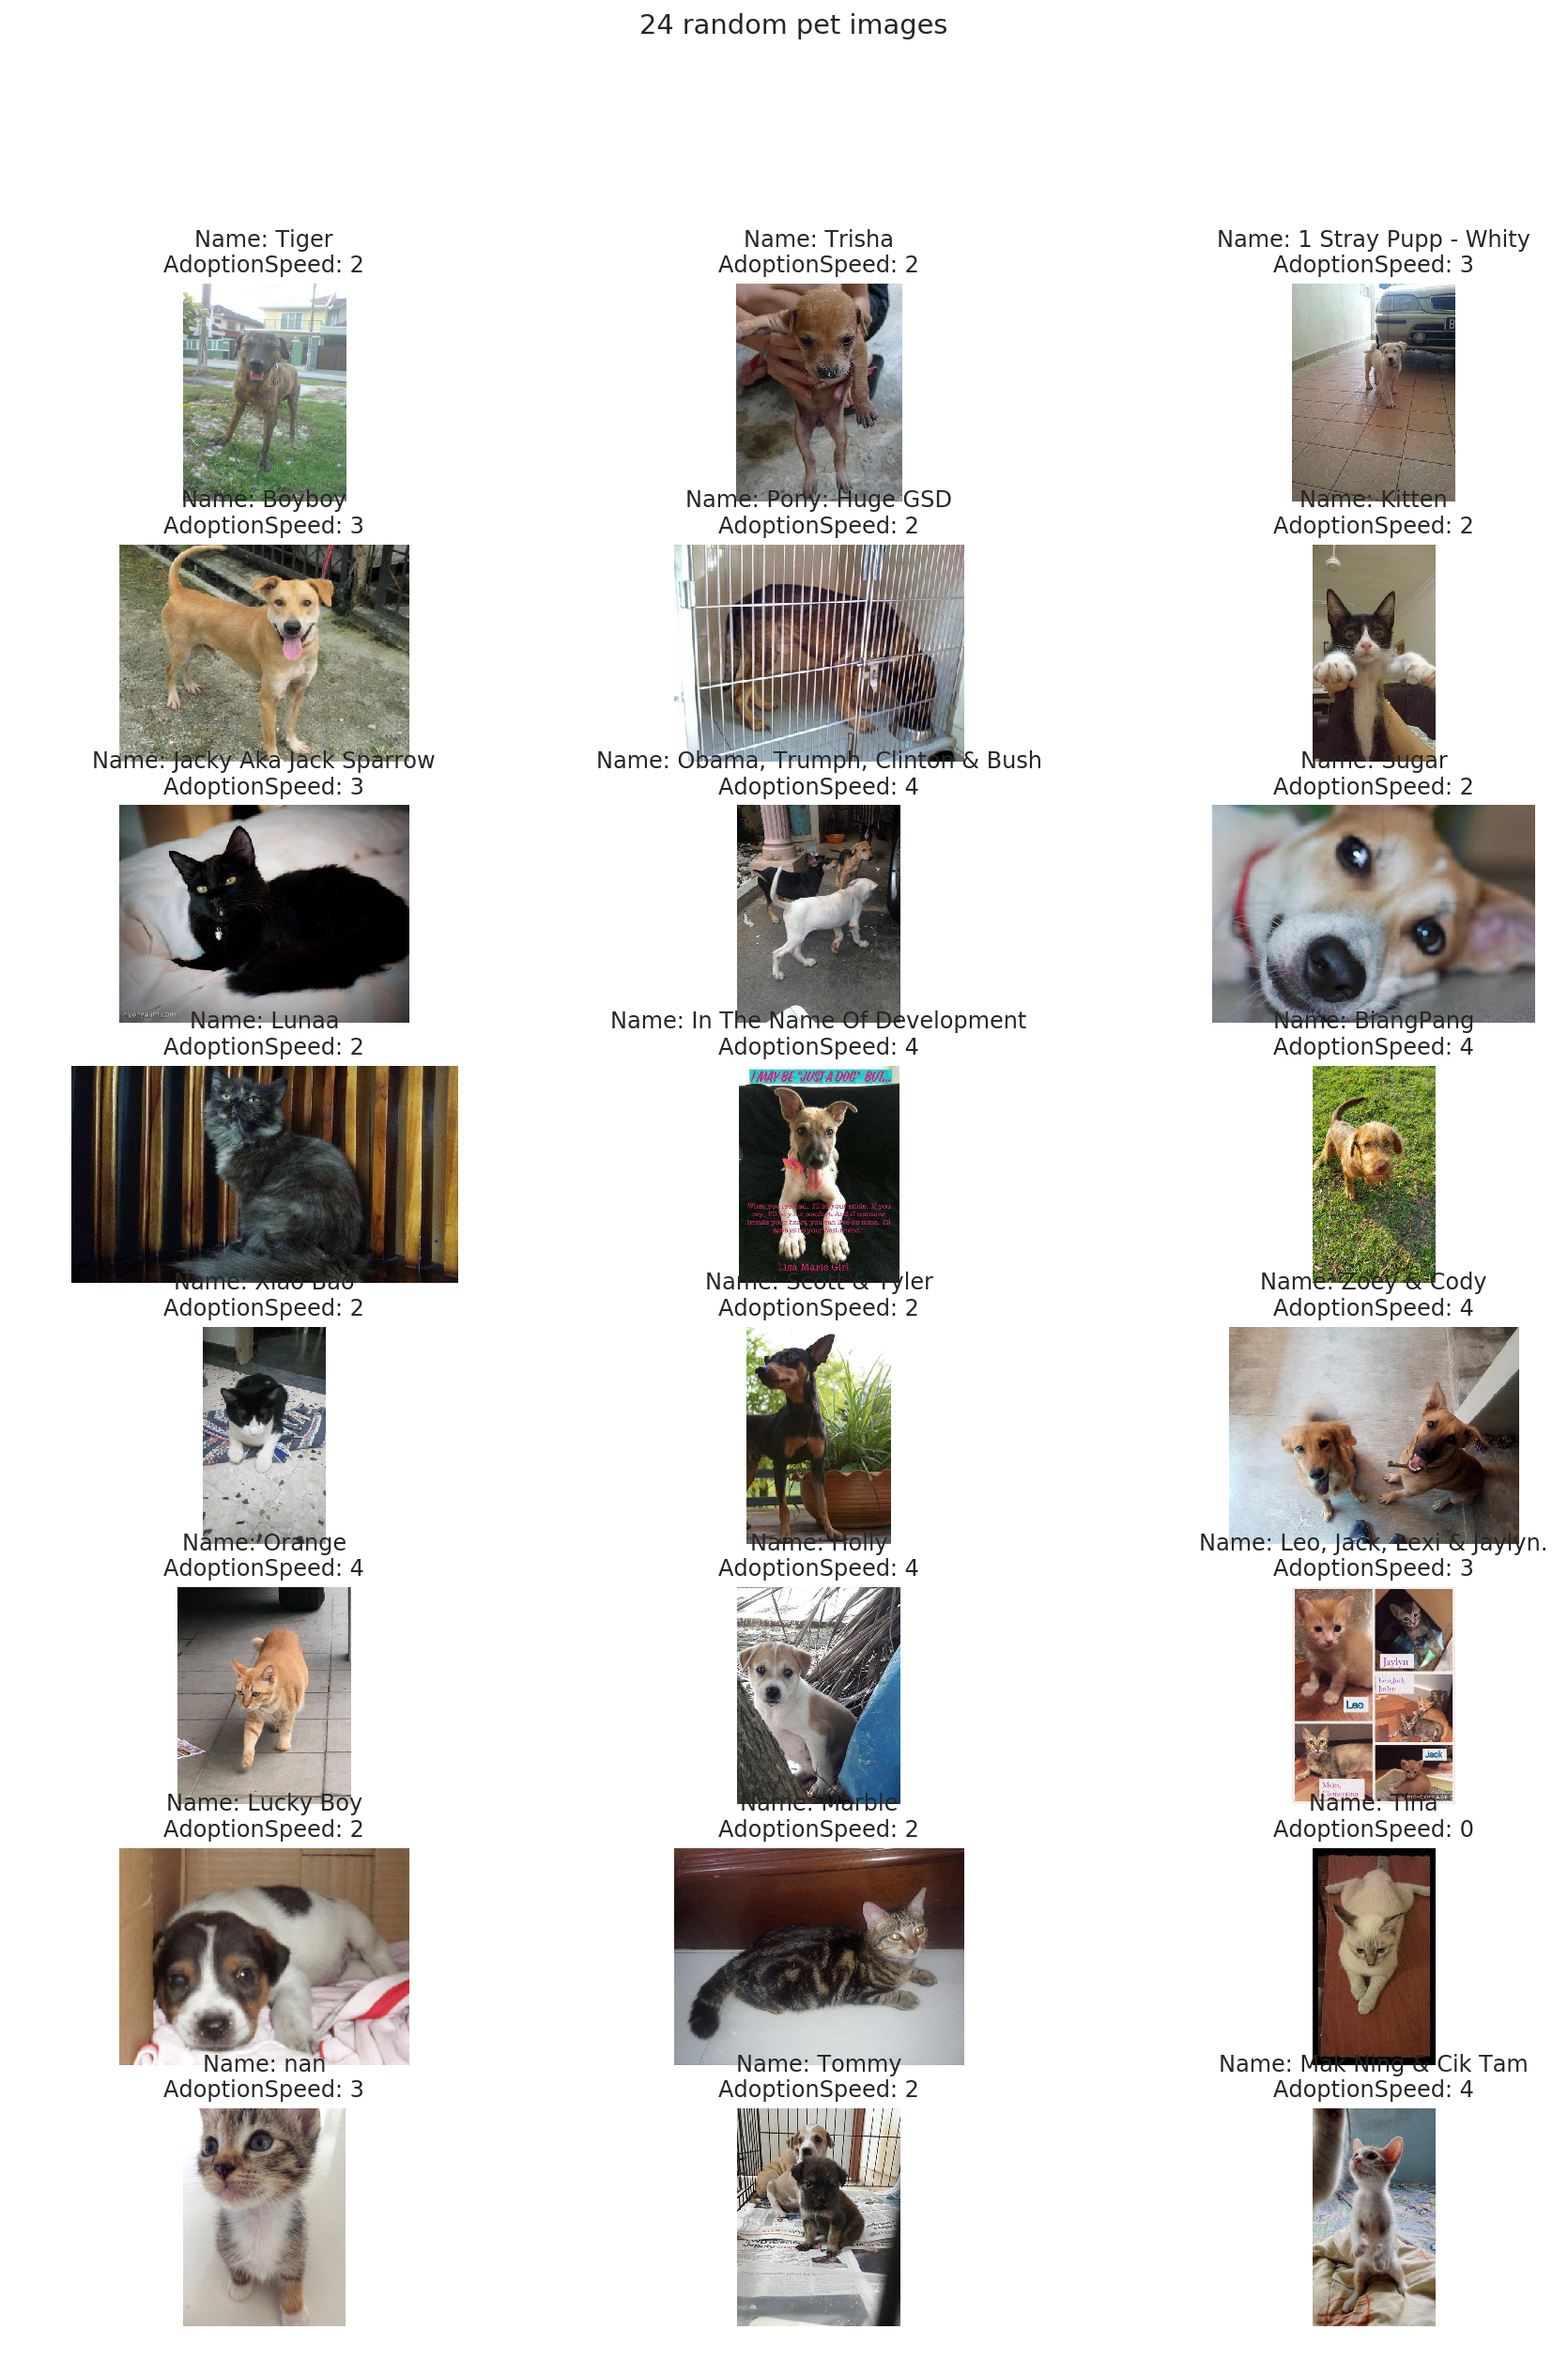

In [16]:
fig, axes = plt.subplots(8,3, figsize=(15, 20))
images_train = os.listdir("../input/train_images/")
fig.suptitle("24 random pet images")
images_train = np.random.choice(images_train, 24)
for i, img in enumerate(images_train):
    image = Image.open("../input/train_images/" + img)
    pet_id = img.split("-")[0]
    axes[i//3, i%3].imshow(image)
    axes[i//3, i%3].grid(False)
    axes[i//3, i%3].set_axis_off()
    axes[i//3, i%3].set_title("Name: {}\nAdoptionSpeed: {}".format(*list(map(str, df_train[df_train.PetID==pet_id][["Name", "AdoptionSpeed"]].values.tolist()[0]))))

> **ALL VERY CUTE!**

# Null count

Percentage of null values in the train set per column

In [17]:
100 * df_train.isnull().sum() / len(df_train)

Type             0.000000
Name             8.383912
Age              0.000000
Breed1           0.000000
Breed2           0.000000
Gender           0.000000
Color1           0.000000
Color2           0.000000
Color3           0.000000
MaturitySize     0.000000
FurLength        0.000000
Vaccinated       0.000000
Dewormed         0.000000
Sterilized       0.000000
Health           0.000000
Quantity         0.000000
Fee              0.000000
State            0.000000
RescuerID        0.000000
VideoAmt         0.000000
Description      0.080037
PetID            0.000000
PhotoAmt         0.000000
AdoptionSpeed    0.000000
dtype: float64

Percentage of null values in the test set per column

In [18]:
100 * df_test.isnull().sum() / len(df_test)

Type            0.000000
Name            7.674772
Age             0.000000
Breed1          0.000000
Breed2          0.000000
Gender          0.000000
Color1          0.000000
Color2          0.000000
Color3          0.000000
MaturitySize    0.000000
FurLength       0.000000
Vaccinated      0.000000
Dewormed        0.000000
Sterilized      0.000000
Health          0.000000
Quantity        0.000000
Fee             0.000000
State           0.000000
RescuerID       0.000000
VideoAmt        0.000000
Description     0.050659
PetID           0.000000
PhotoAmt        0.000000
dtype: float64

In general, there are not many null values. There seems to be only null values in the Name and Description columns. Either PetFinder considers those 2 values as mandatory ones to get filled during pet card completition or the null values are encoded with a value, we will check later.

# Duplicates

In [19]:
df_train[df_train.duplicated(keep=False)].shape

(0, 24)

There are no full-duplicates in the data set. Let's see if there are duplicates once we remove name, Pet ID and description (we keep rescuer ID though)

In [20]:
cols = [col for col in df_train.columns.ravel() if col not in ["PetID", "Name", "Description", "AdoptionSpeed"]]

In the train set

In [21]:
dups = df_train[df_train[cols].duplicated(keep=False)].sort_values(by=cols)
print(f"Shape of matrix with duplicated rows not considering petid, name nor description {dups.shape}")
dups.head(2)

Shape of matrix with duplicated rows not considering petid, name nor description (698, 24)


Type    Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
2543     1  Gentle    0     307       0       2       2       0       0   
5116     1   Batty    0     307       0       2       2       0       0   

      MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
2543             2          1           2         2           1       1   
5116             2          1           2         2           1       1   

      Quantity  Fee  State                         RescuerID  VideoAmt  \
2543         1    0  41326  57eee9014beffd4fbd83a45dfb2c72ff         0   
5116         1    0  41326  57eee9014beffd4fbd83a45dfb2c72ff         0   

                                                                                                            Description  \
2543  2 of my dogs leads me to them while we are having routine hill track. No mum is there to take care of 5 siblings.   
5116  2 of my dogs leads me to them while we are having routine hill track. No mum is there to take care of 5 siblings.   

          PetID  PhotoAmt  AdoptionSpeed  
2543  1b154dffa       5.0              1  
5116  0e83fbe2a       5.0              3

In the test set

In [22]:
dups = df_test[df_test[cols].duplicated(keep=False)].sort_values(by=cols)
print(f"Shape of matrix with duplicated rows not considering petid, name nor description {dups.shape}")
dups.head(2)

Shape of matrix with duplicated rows not considering petid, name nor description (97, 23)


Type     Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
2450     1   Cheeky    1     307       0       1       2       0       0   
2456     1  Brownie    1     307       0       1       2       0       0   

      MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
2450             2          1           2         2           2       1   
2456             2          1           2         2           2       1   

      Quantity  Fee  State                         RescuerID  VideoAmt  \
2450         1    0  41326  3ac55573c79a8eda650632f8b70a35ef         1   
2456         1    0  41326  3ac55573c79a8eda650632f8b70a35ef         1   

                                                                                                                                                                                                                                                    Description  \
2450   The mother is a stray in the neighbourhood. Thou he is the tiny one in the litter but he is very cheeky and playful. The most fun one. As I grow, my ears start to stand up in alert. Therefore, i can pick up sound easier and be a good guard dog too.   
2456  I am strongest among my siblings. I am independent puppy. I like to spend time by myself and not need to cuddle together with my other siblings. I look like my father. He is a strong brown dog with big strong bones. My short hair will make me be ...   

          PetID  PhotoAmt  
2450  4eeb96cc3       3.0  
2456  4a96d8135       3.0


## Correlation matrix

In [24]:
def plot_correlation_matrix(df):
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

## All animals

Correlation matrix of whole train set

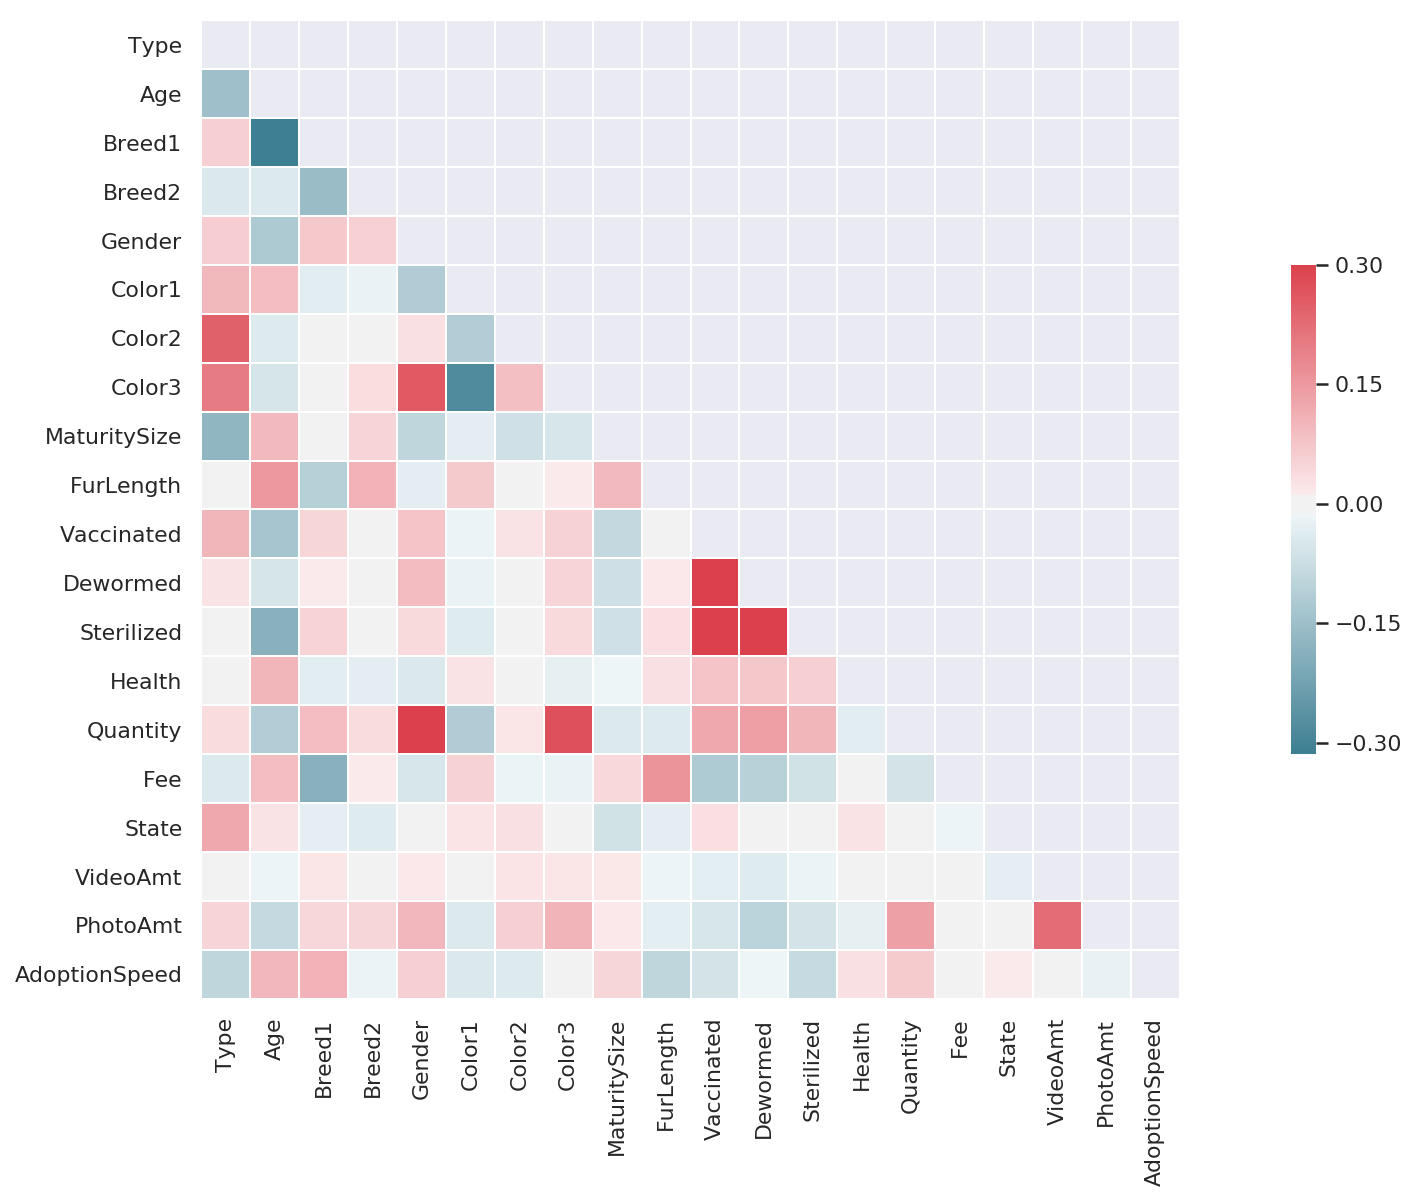

In [25]:
plot_correlation_matrix(df_train)

Correlation matrix of whole test set

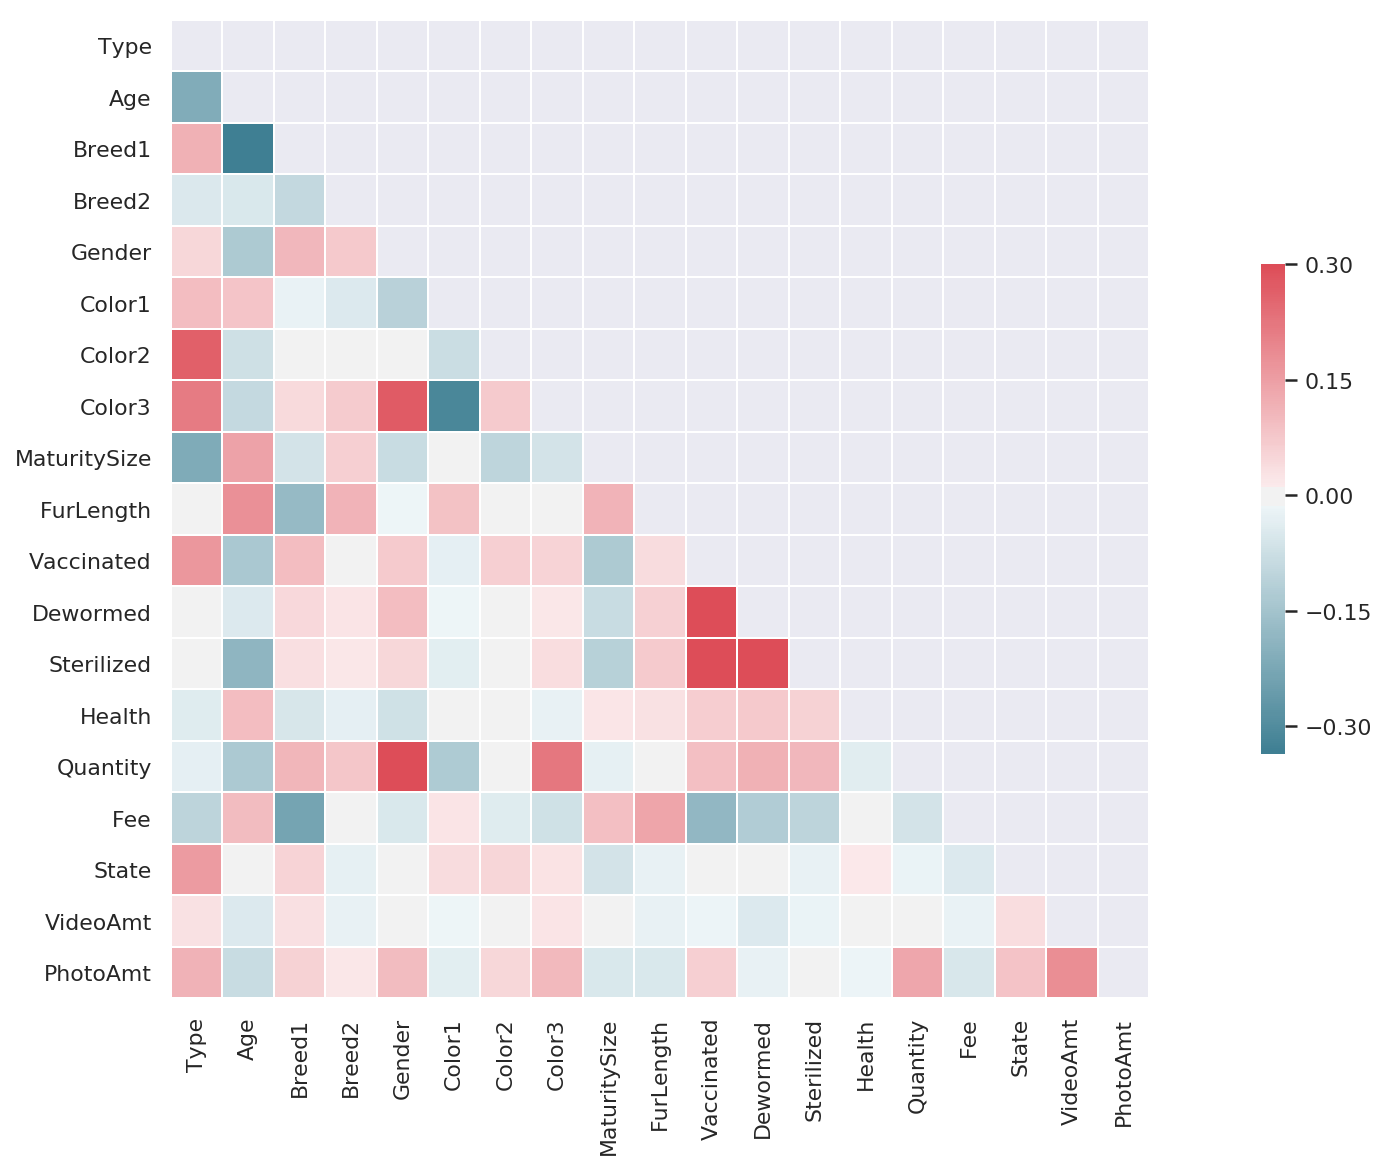

In [26]:
plot_correlation_matrix(df_test)

## Only dogs

Correlation matrix of dogs part of the train set

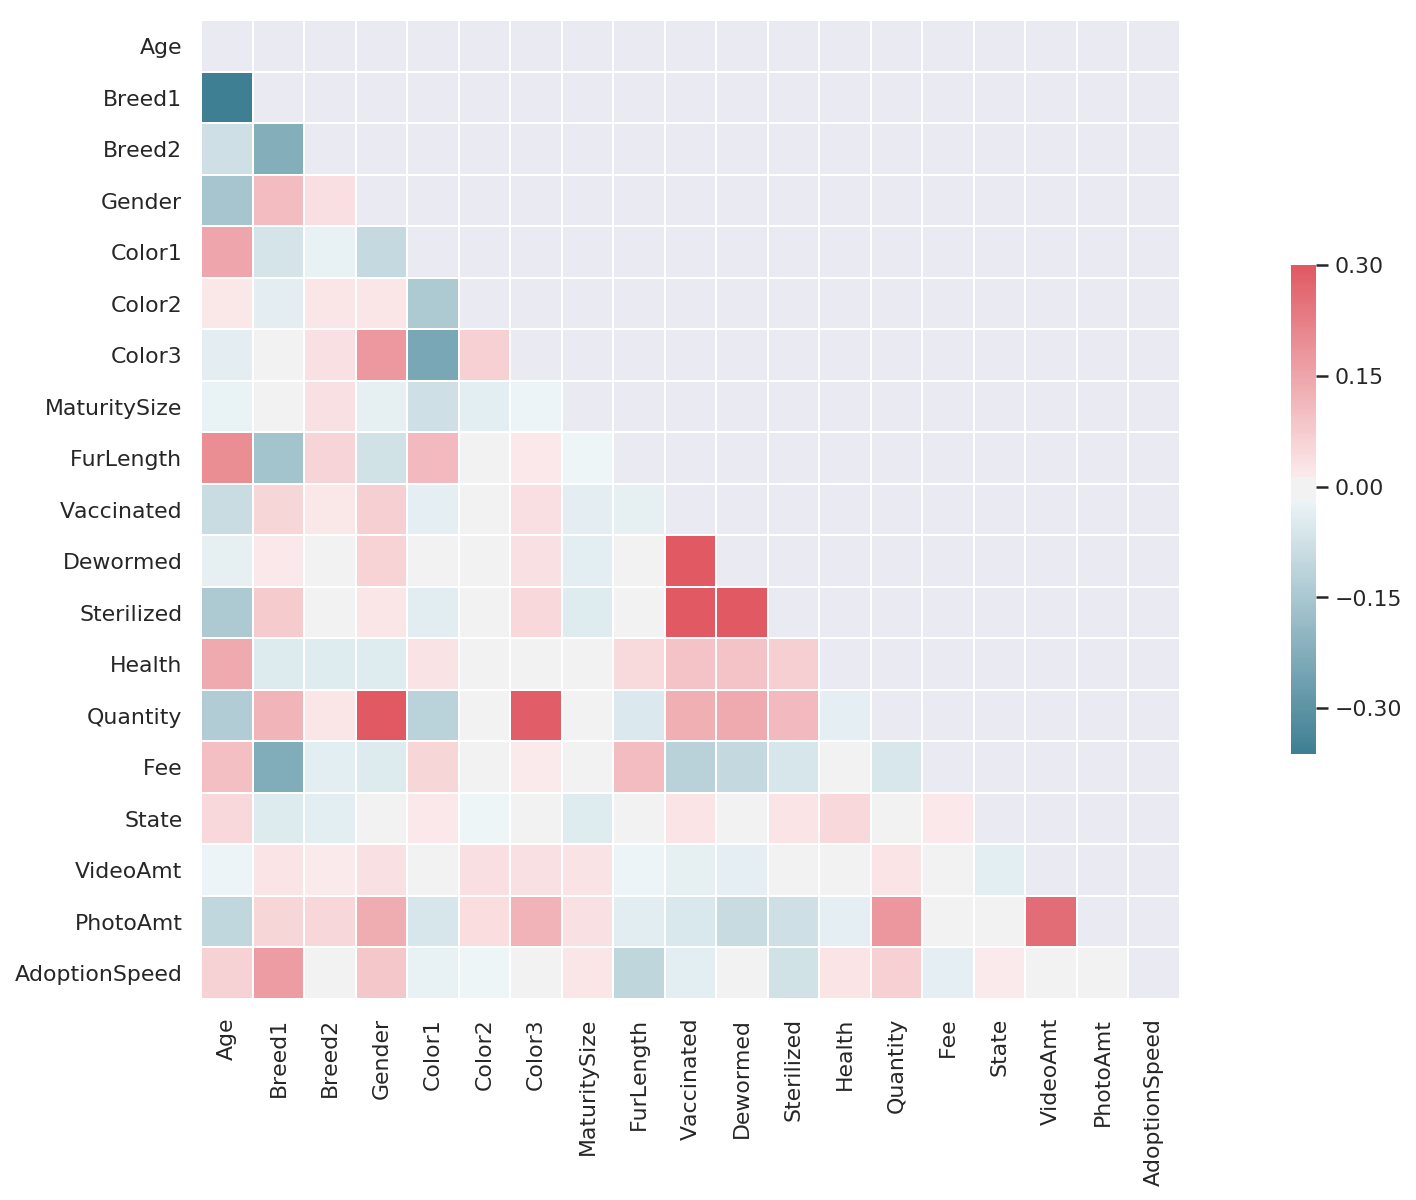

In [27]:
plot_correlation_matrix(df_train[df_train.Type==1].drop(columns="Type"))

Correlation matrix of dogs part of the test set

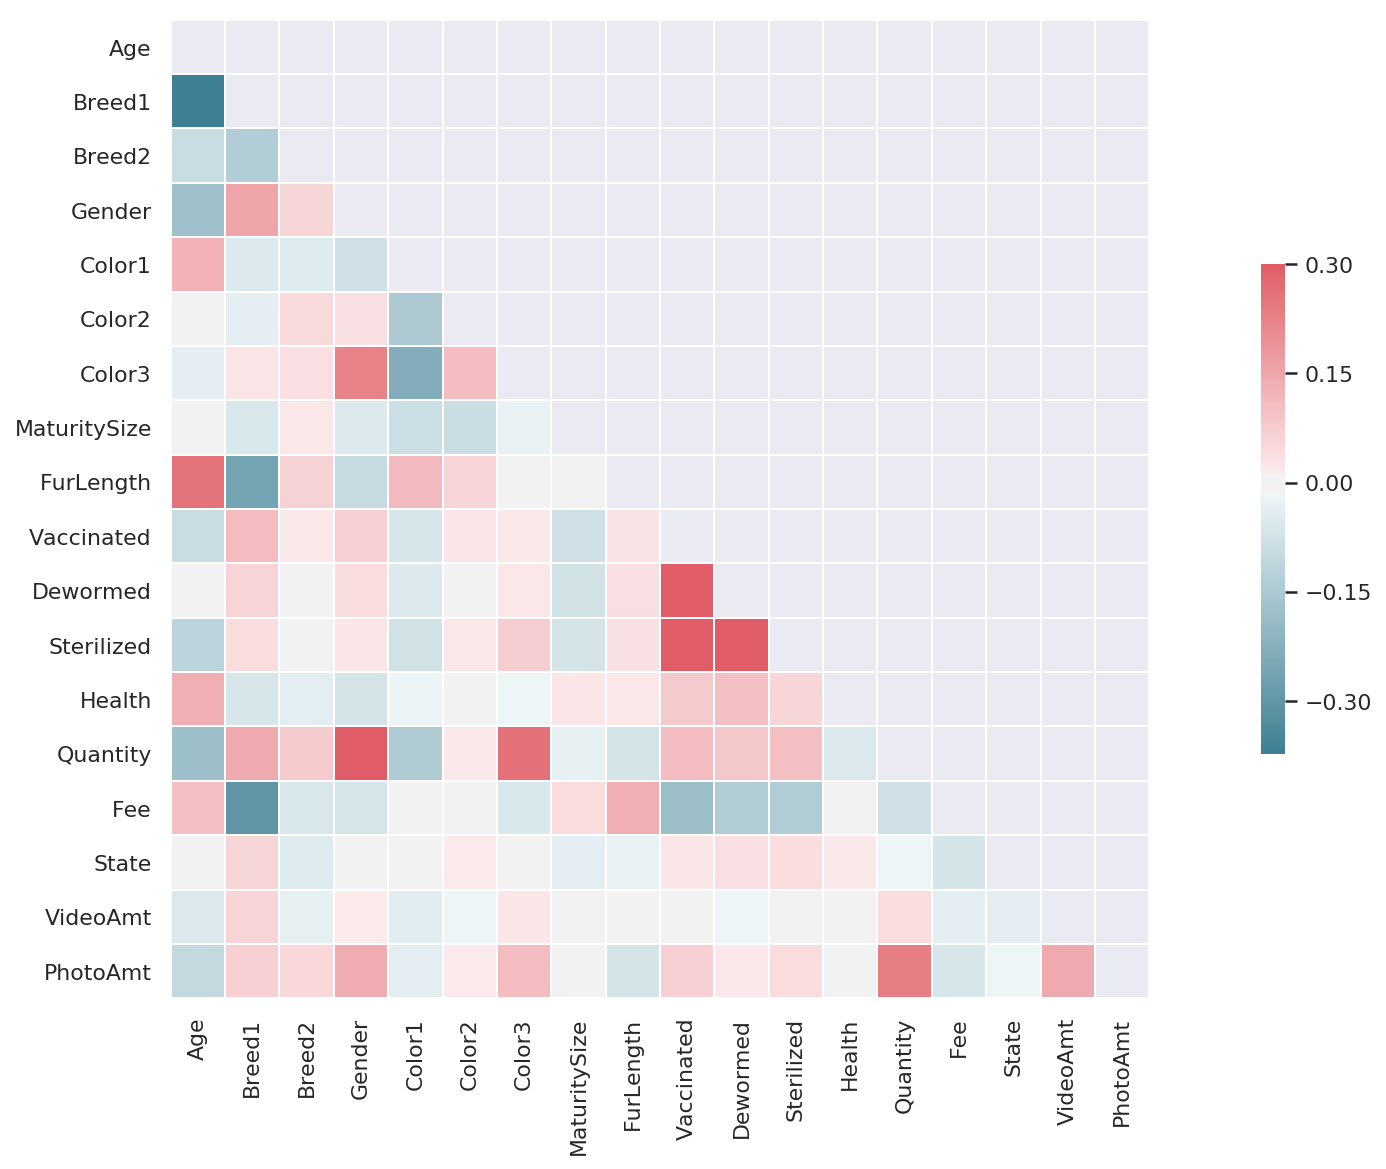

In [28]:
plot_correlation_matrix(df_test[df_test.Type==1].drop(columns="Type"))

## Only cats

Correlation matrix of cats part of the train set

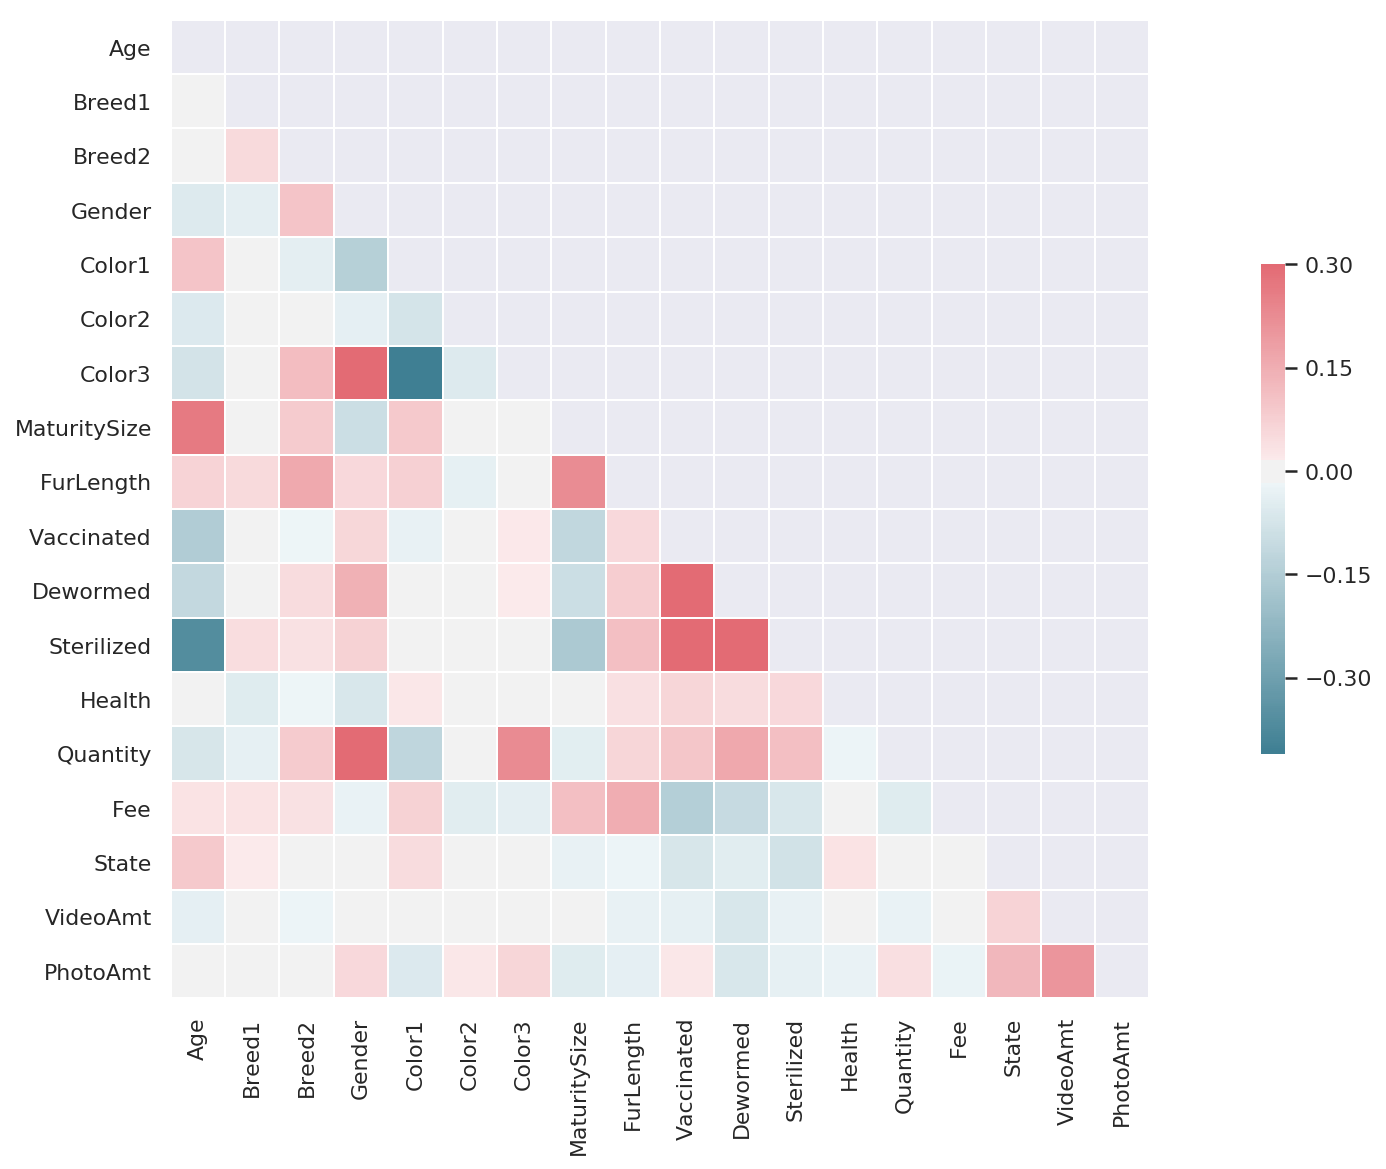

In [29]:
plot_correlation_matrix(df_test[df_test.Type==2].drop(columns="Type"))

Correlation matrix of cats part of the test set

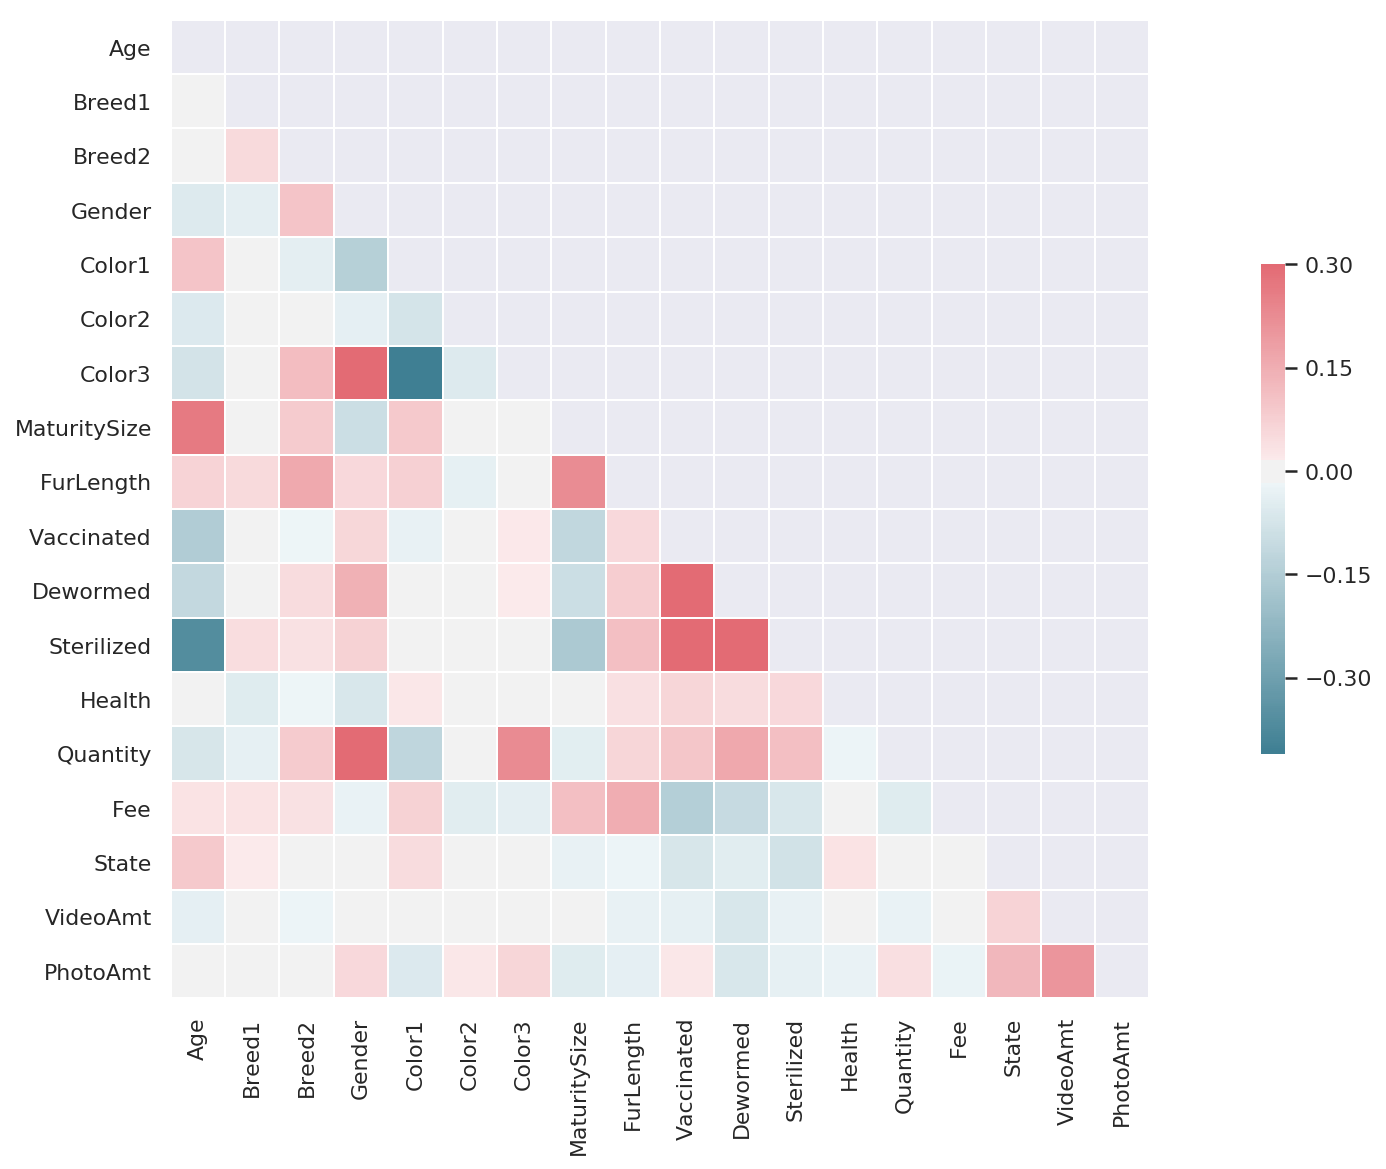

In [30]:
plot_correlation_matrix(df_test[df_test.Type==2].drop(columns="Type"))


# Distribution

In [31]:
feats = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt', 'AdoptionSpeed']

## Univariate


First of all, let's see the target distribution

In [32]:
def plot_distribution(df, feat):
    fig, ax = plt.subplots(figsize=(17,5))
    sns.countplot(df_train[feat])
    ax.xaxis.set_label_text(feat,fontdict= {'size':14})
    ax.yaxis.set_label_text("Count",fontdict= {'size':14})
    plt.show()
    print(f"Total number of unique values for feature {feat} is {df[feat].nunique()}")
    print(100 * df_train[feat].value_counts(normalize=True, dropna=False))

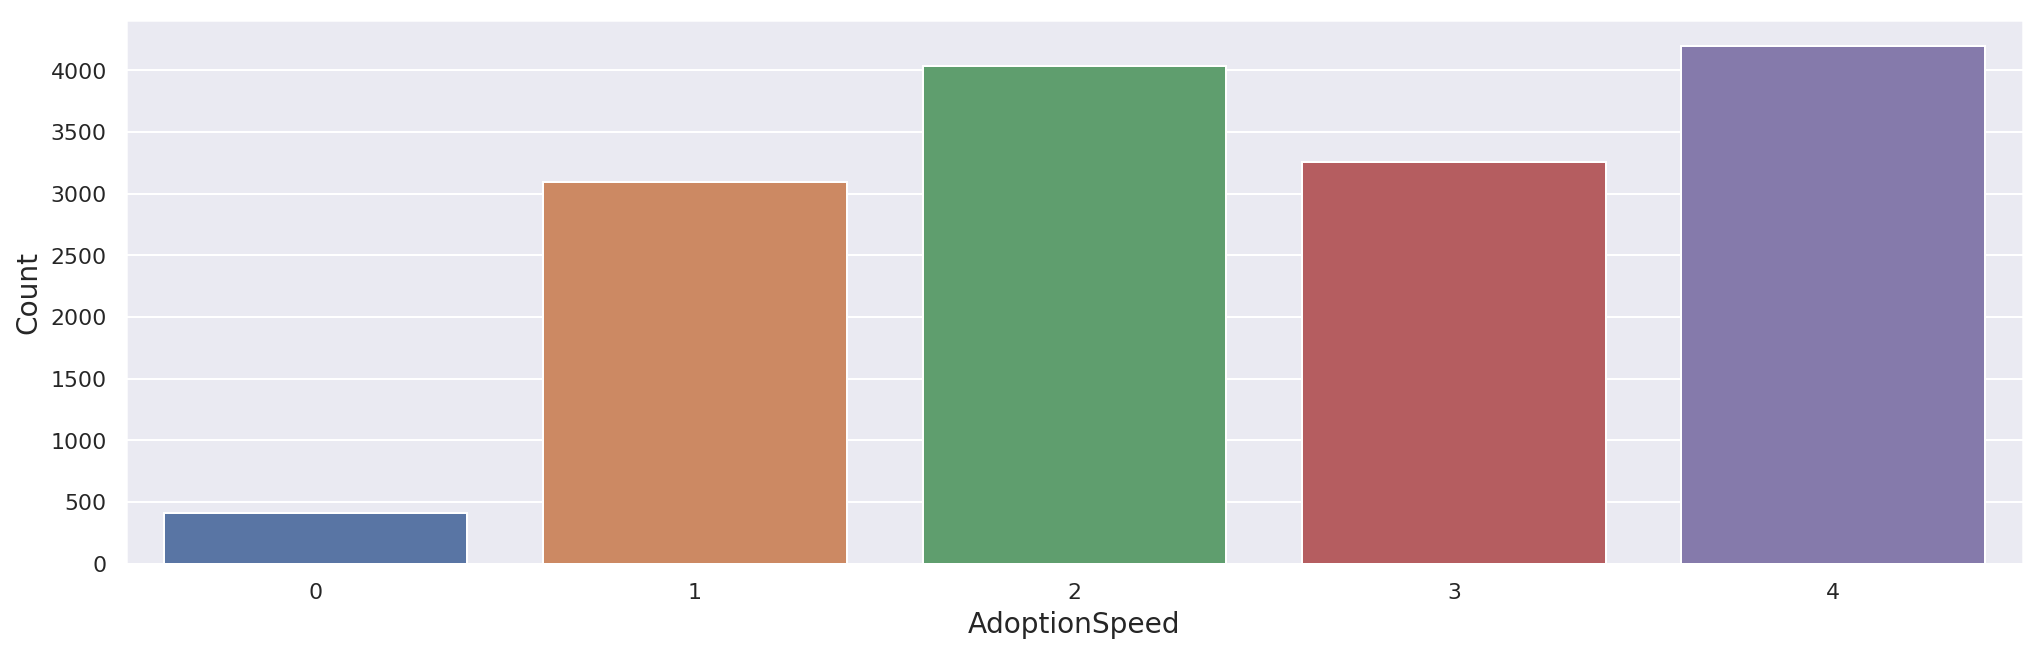

Total number of unique values for feature AdoptionSpeed is 5
4    27.993063
2    26.925899
3    21.736811
1    20.609618
0     2.734609
Name: AdoptionSpeed, dtype: float64


In [33]:
plot_distribution(df_train, "AdoptionSpeed")

And now for the rest of the features

Univariate distribution of feature Type


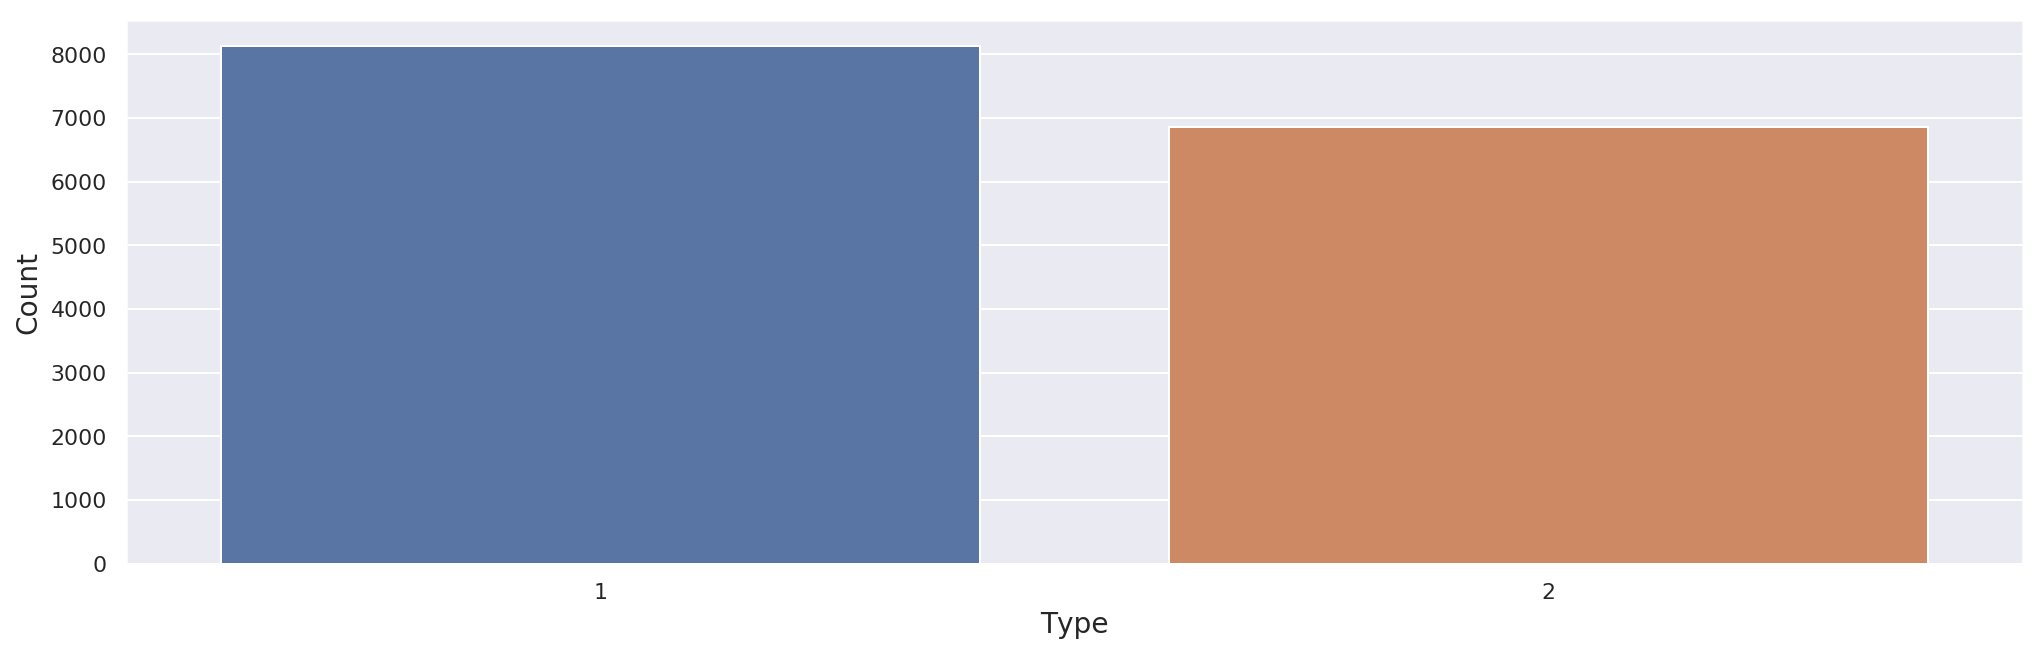

Total number of unique values for feature Type is 2
1    54.238645
2    45.761355
Name: Type, dtype: float64
Univariate distribution of feature Age


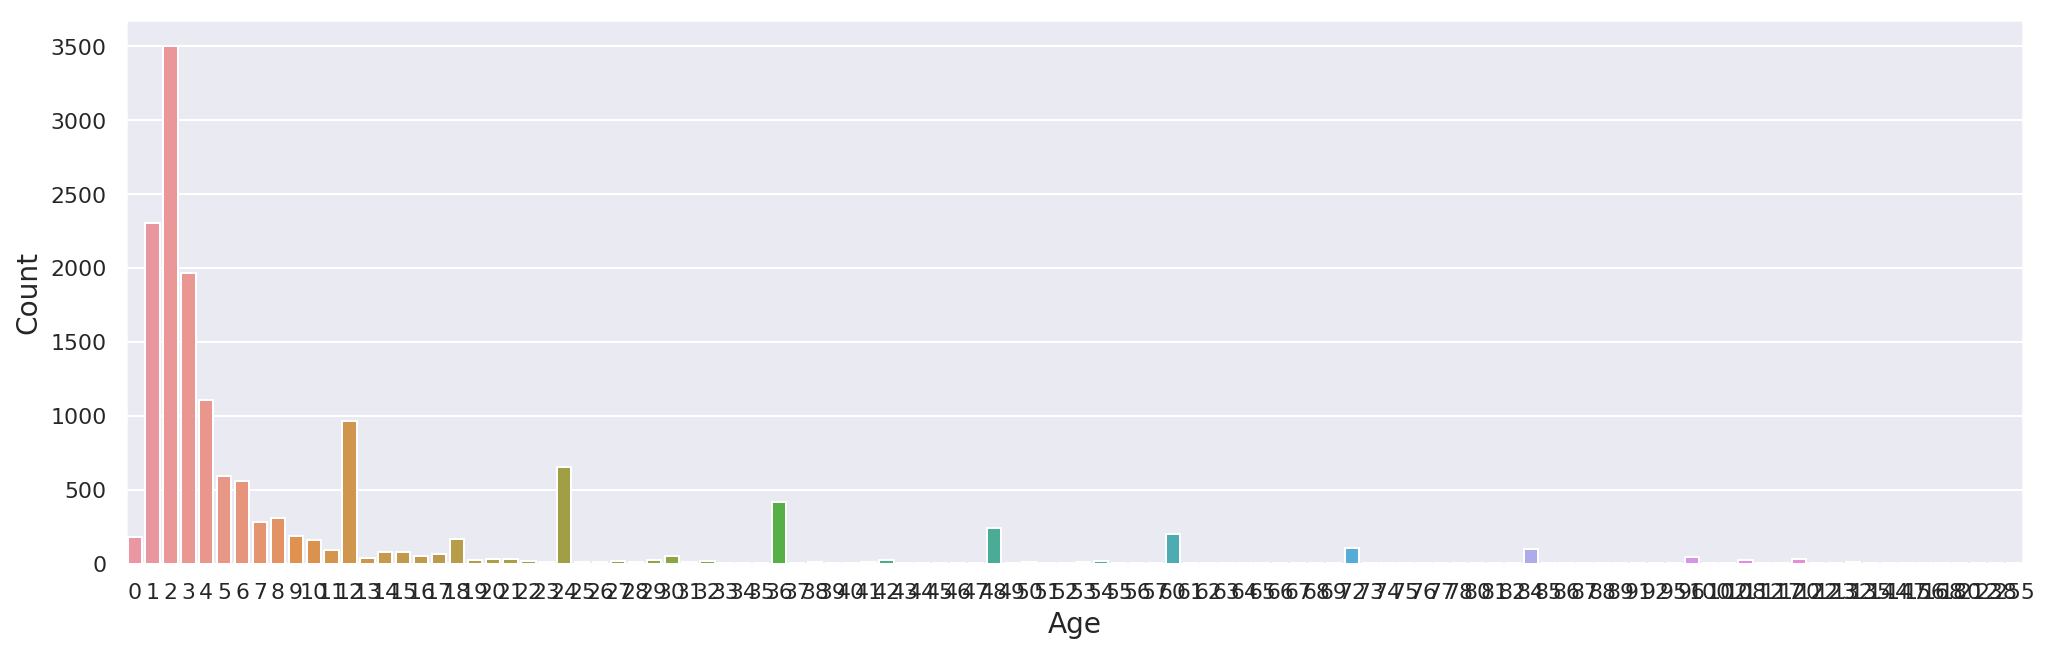

Total number of unique values for feature Age is 106
2      23.364237
1      15.367171
3      13.112786
4       7.396785
12      6.449677
24      4.342026
5       3.968519
6       3.721737
36      2.781298
8       2.060962
7       1.874208
48      1.607417
60      1.327286
9       1.227239
0       1.193890
18      1.100514
10      1.080504
72      0.693657
84      0.680317
11      0.626959
15      0.526913
14      0.506903
17      0.446875
30      0.346829
16      0.333489
96      0.306810
13      0.266791
120     0.220103
20      0.213433
21      0.186754
19      0.173414
29      0.166744
42      0.146735
108     0.140065
22      0.126726
27      0.113386
32      0.100047
54      0.100047
28      0.086707
26      0.086707
25      0.066698
41      0.066698
31      0.060028
132     0.053358
50      0.053358
53      0.053358
38      0.053358
23      0.053358
39      0.046688
51      0.046688
         ...    
46      0.033349
33      0.026679
76      0.026679
65      0.026679
144     0.02

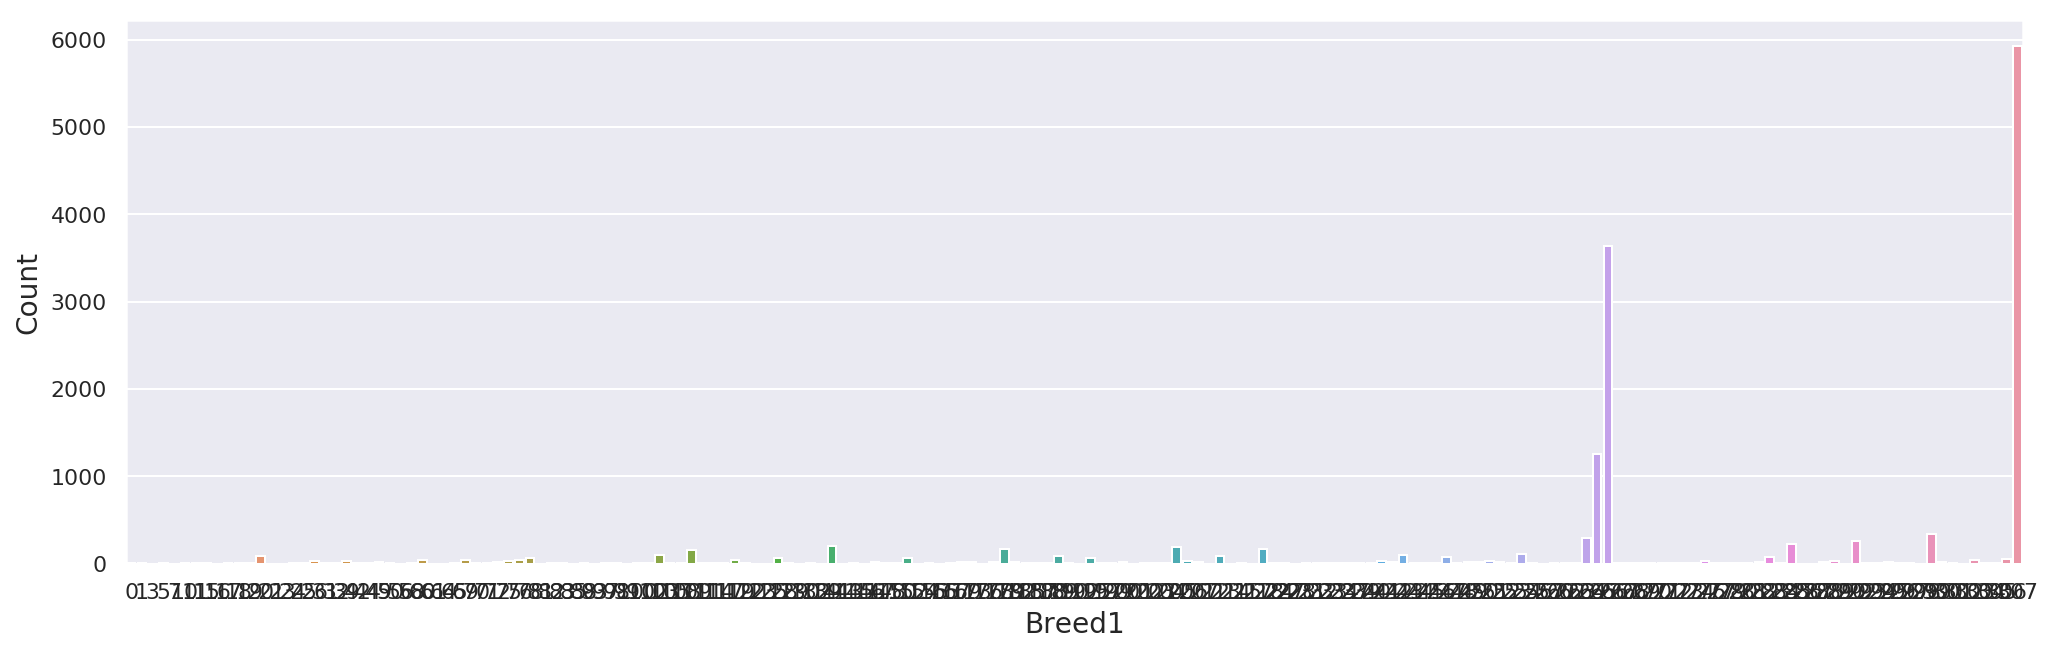

Total number of unique values for feature Breed1 is 176
307    39.531781
266    24.237978
265     8.390582
299     2.281064
264     1.974255
292     1.760822
285     1.474021
141     1.367305
205     1.267258
179     1.113853
218     1.080504
109     1.007137
254     0.700327
103     0.653638
243     0.626959
20      0.600280
213     0.593610
189     0.586941
283     0.486894
247     0.473554
195     0.460215
152     0.446875
128     0.426866
78      0.413526
306     0.373508
303     0.280131
69      0.273461
76      0.260121
119     0.246782
60      0.246782
251     0.226772
276     0.226772
241     0.186754
75      0.186754
289     0.173414
26      0.173414
39      0.173414
206     0.166744
207     0.160075
173     0.153405
252     0.153405
178     0.146735
182     0.140065
300     0.140065
147     0.126726
249     0.126726
169     0.120056
282     0.113386
242     0.113386
288     0.106716
         ...    
232     0.013340
148     0.013340
132     0.013340
88      0.013340
108     0

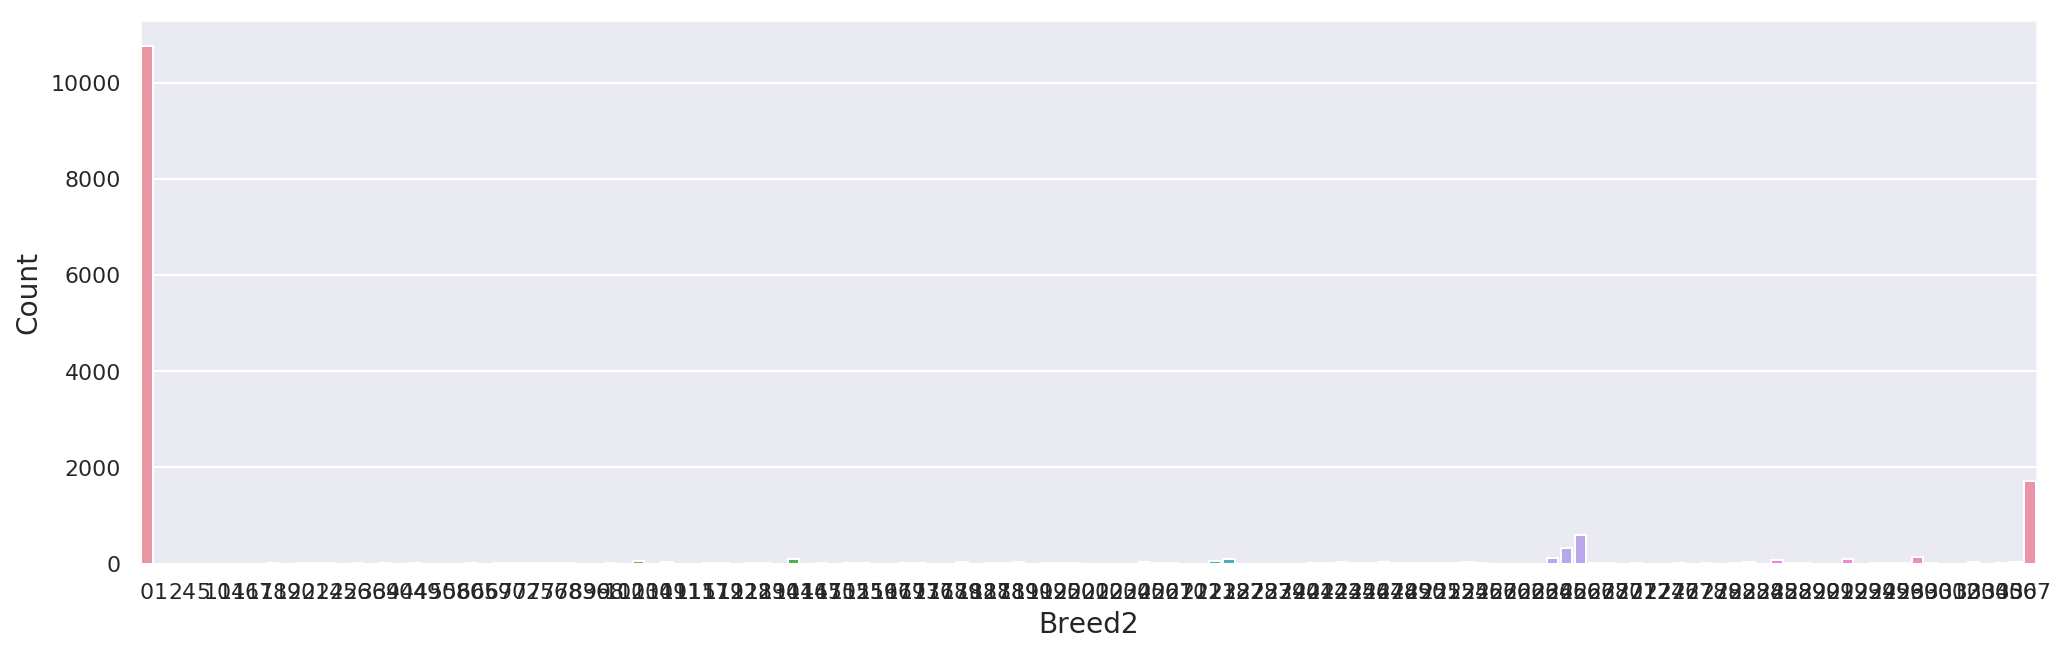

Total number of unique values for feature Breed2 is 135
0      71.780164
307    11.518709
266     3.995198
265     2.140999
299     0.920430
264     0.833722
292     0.700327
218     0.606950
141     0.573601
285     0.520243
103     0.366838
213     0.326819
254     0.280131
189     0.266791
109     0.260121
247     0.260121
179     0.253452
205     0.213433
243     0.200093
306     0.160075
283     0.160075
303     0.160075
78      0.146735
276     0.146735
128     0.140065
195     0.133396
152     0.120056
252     0.120056
26      0.113386
75      0.106716
20      0.106716
117     0.100047
119     0.100047
76      0.093377
39      0.073368
251     0.073368
241     0.066698
187     0.060028
300     0.060028
169     0.060028
295     0.053358
147     0.053358
288     0.053358
60      0.046688
200     0.046688
72      0.046688
69      0.046688
305     0.040019
70      0.040019
268     0.040019
         ...    
96      0.013340
270     0.013340
19      0.013340
150     0.013340
102     0

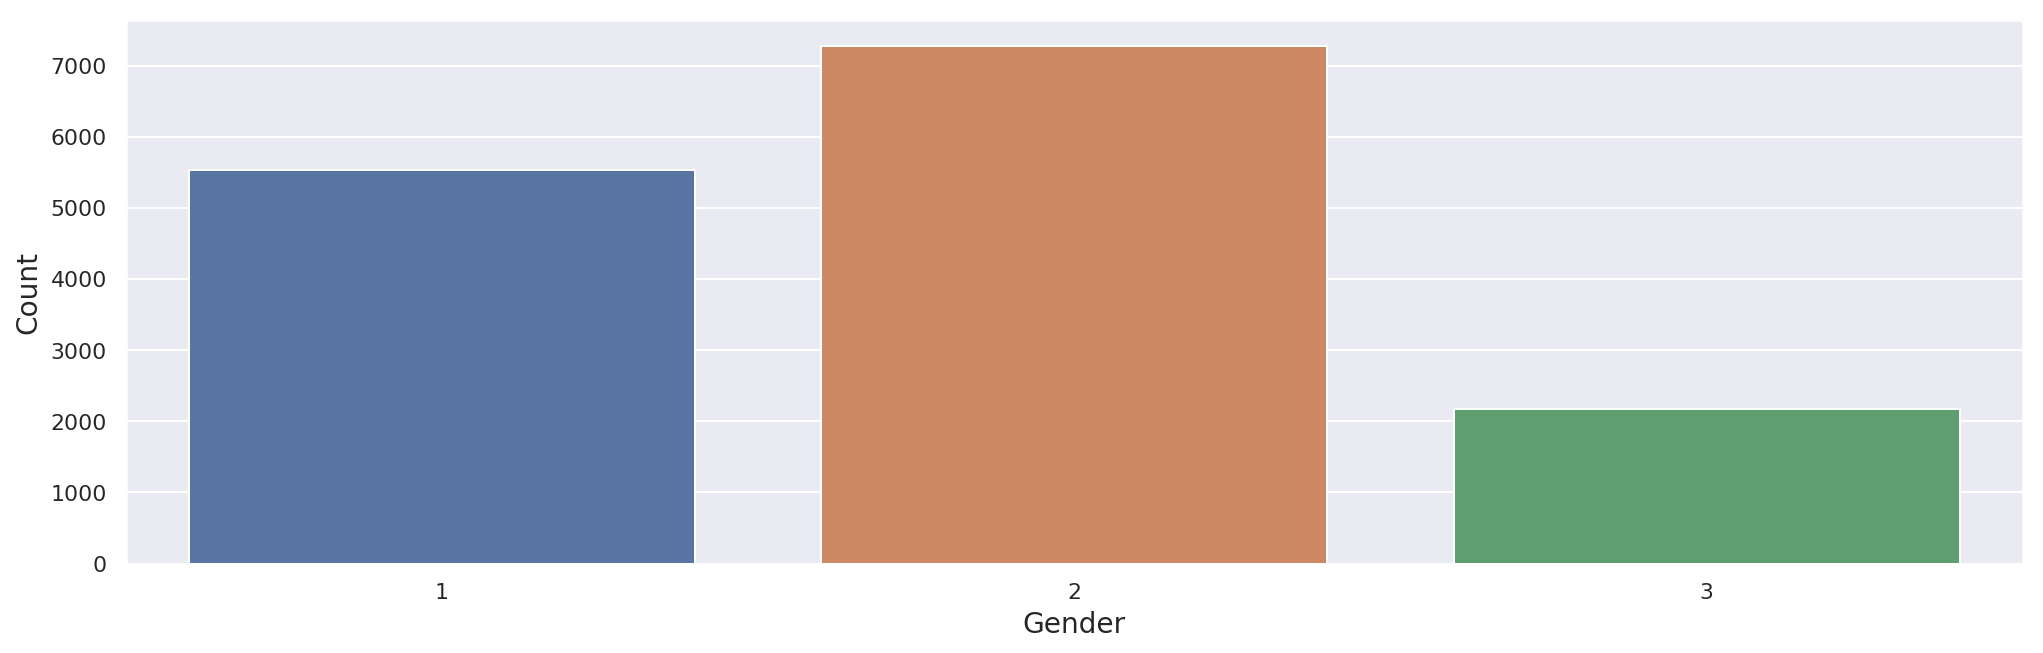

Total number of unique values for feature Gender is 3
2    48.535983
1    36.923898
3    14.540119
Name: Gender, dtype: float64
Univariate distribution of feature Color1


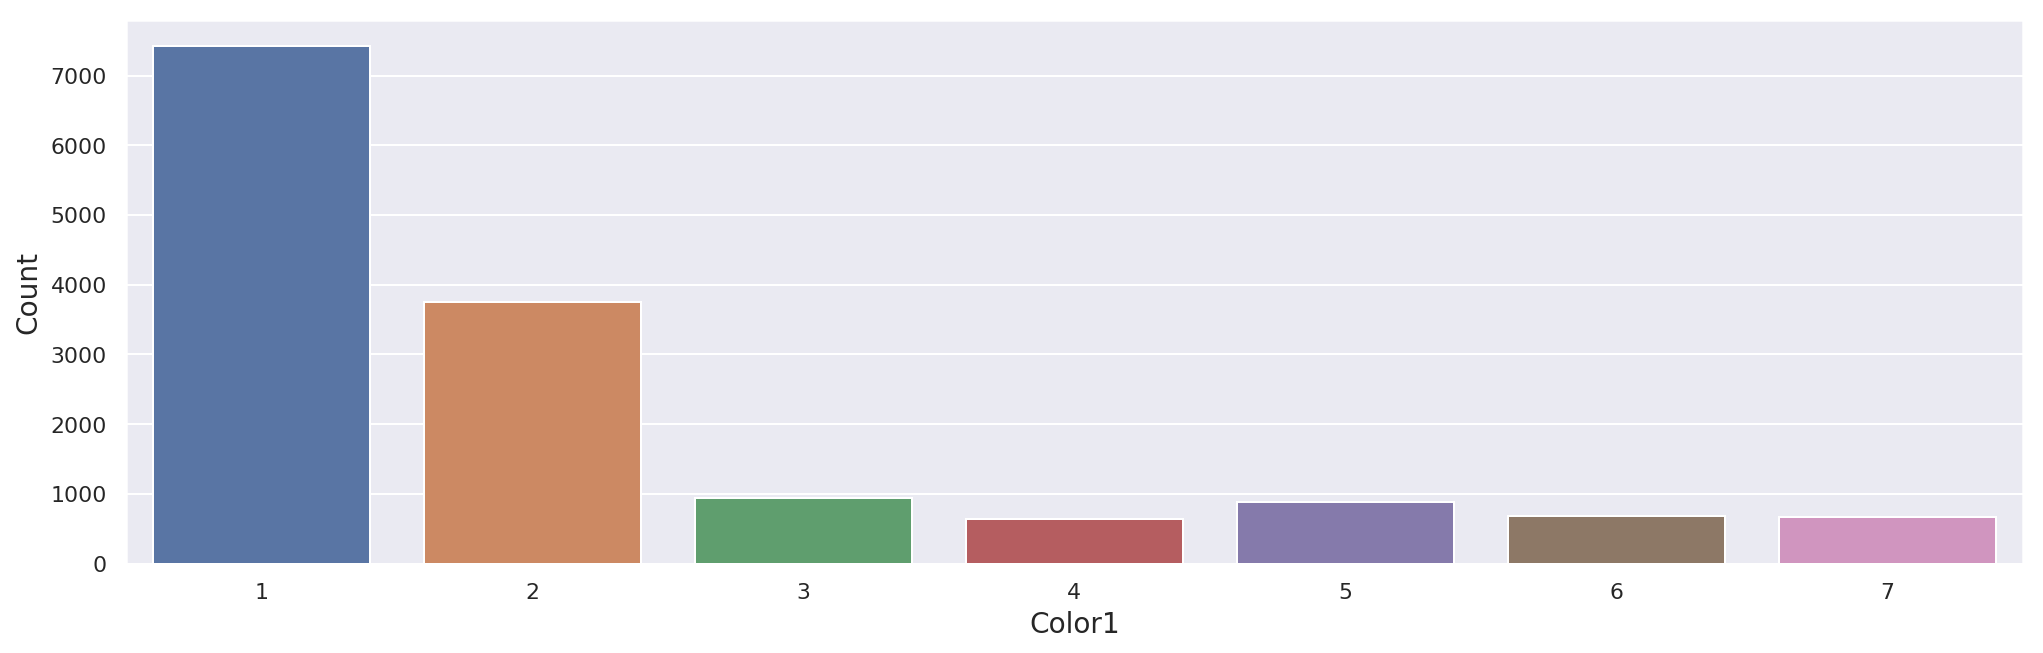

Total number of unique values for feature Color1 is 7
1    49.536450
2    25.011672
3     6.316281
5     5.896085
6     4.562129
7     4.448743
4     4.228640
Name: Color1, dtype: float64
Univariate distribution of feature Color2


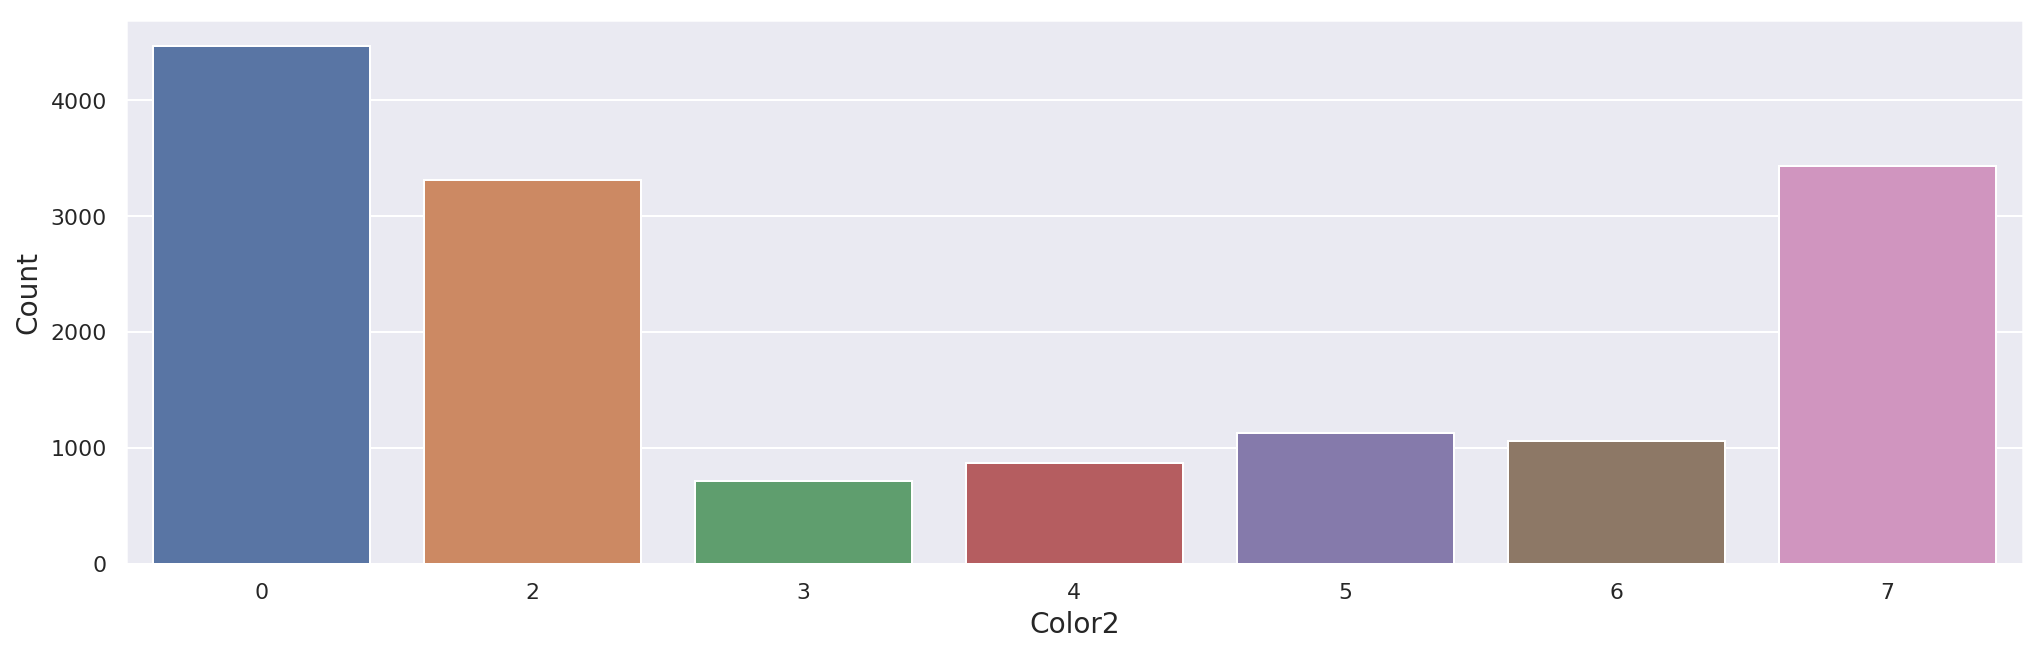

Total number of unique values for feature Color2 is 7
0    29.820583
7    22.930701
2    22.096979
5     7.523511
6     7.089975
4     5.802708
3     4.735543
Name: Color2, dtype: float64
Univariate distribution of feature Color3


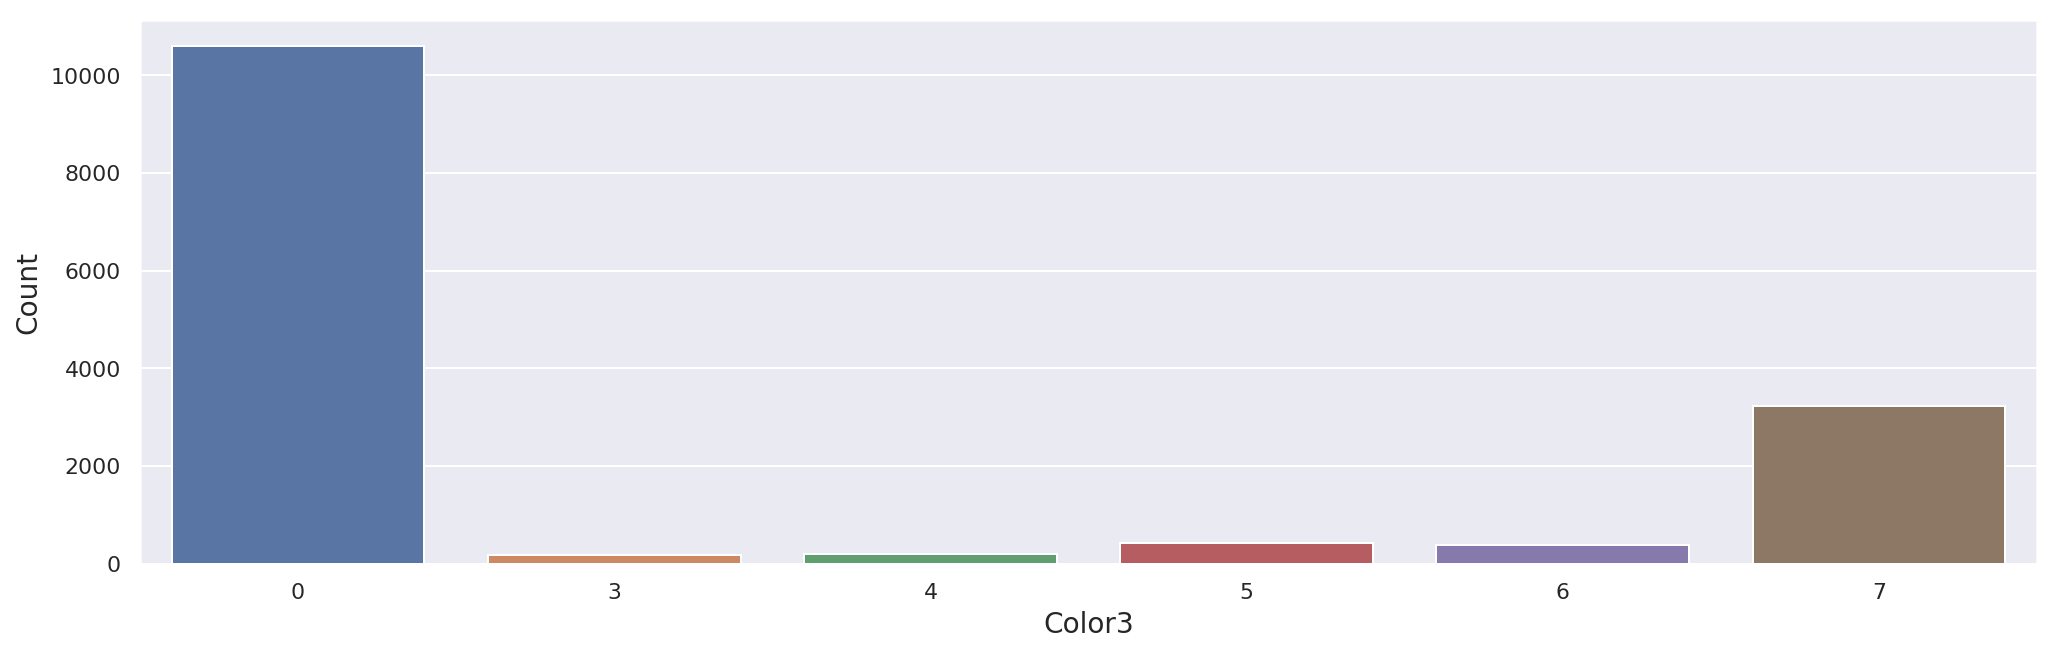

Total number of unique values for feature Color3 is 6
0    70.726339
7    21.483359
5     2.781298
6     2.521177
4     1.320616
3     1.167211
Name: Color3, dtype: float64
Univariate distribution of feature MaturitySize


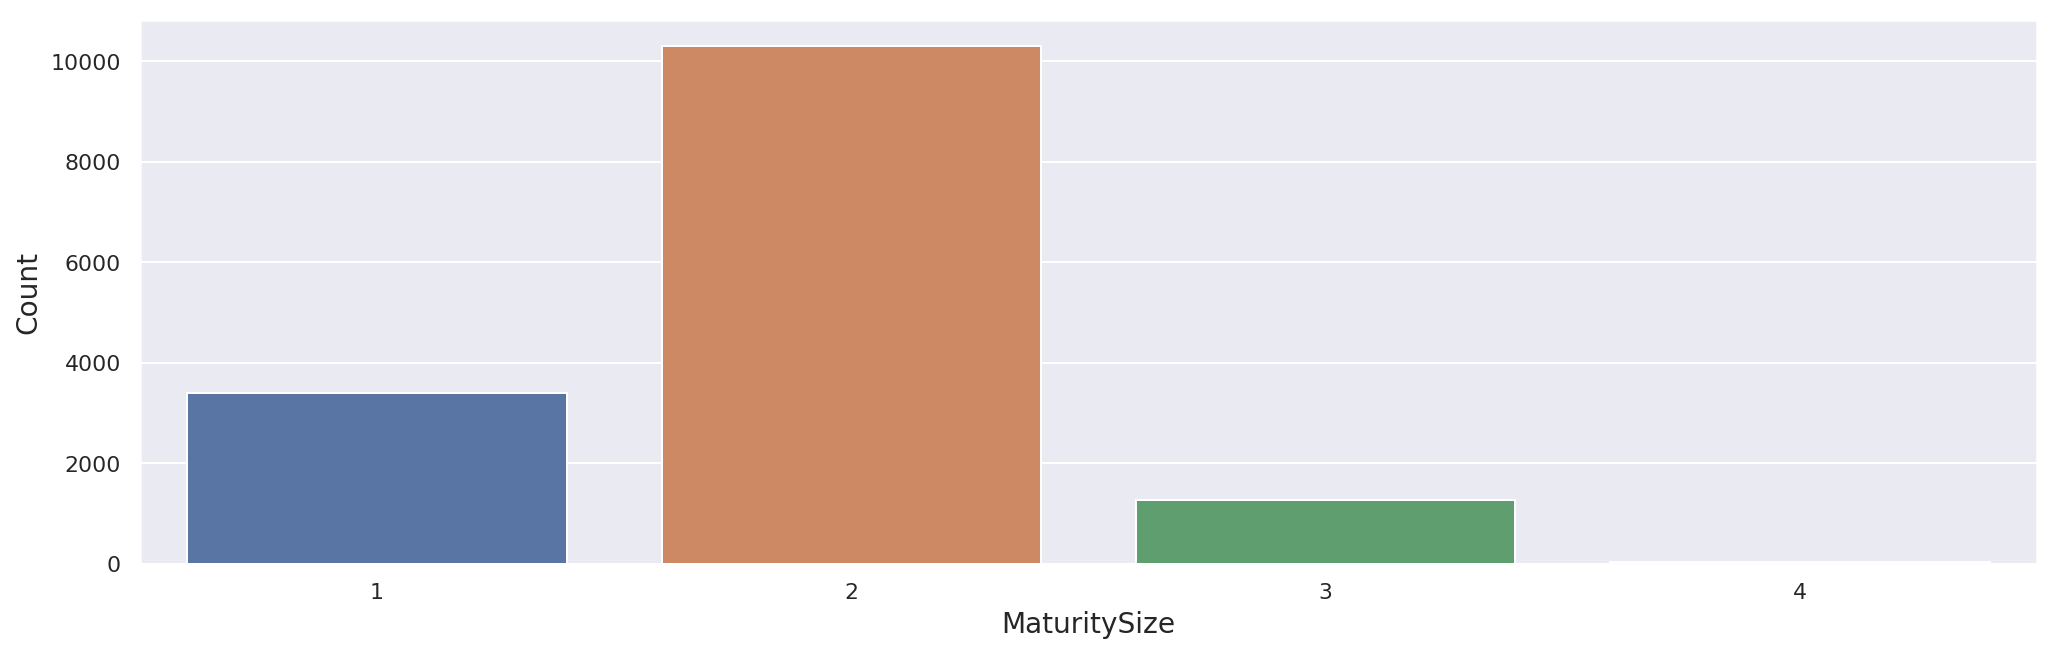

Total number of unique values for feature MaturitySize is 4
2    68.732075
1    22.643900
3     8.403922
4     0.220103
Name: MaturitySize, dtype: float64
Univariate distribution of feature FurLength


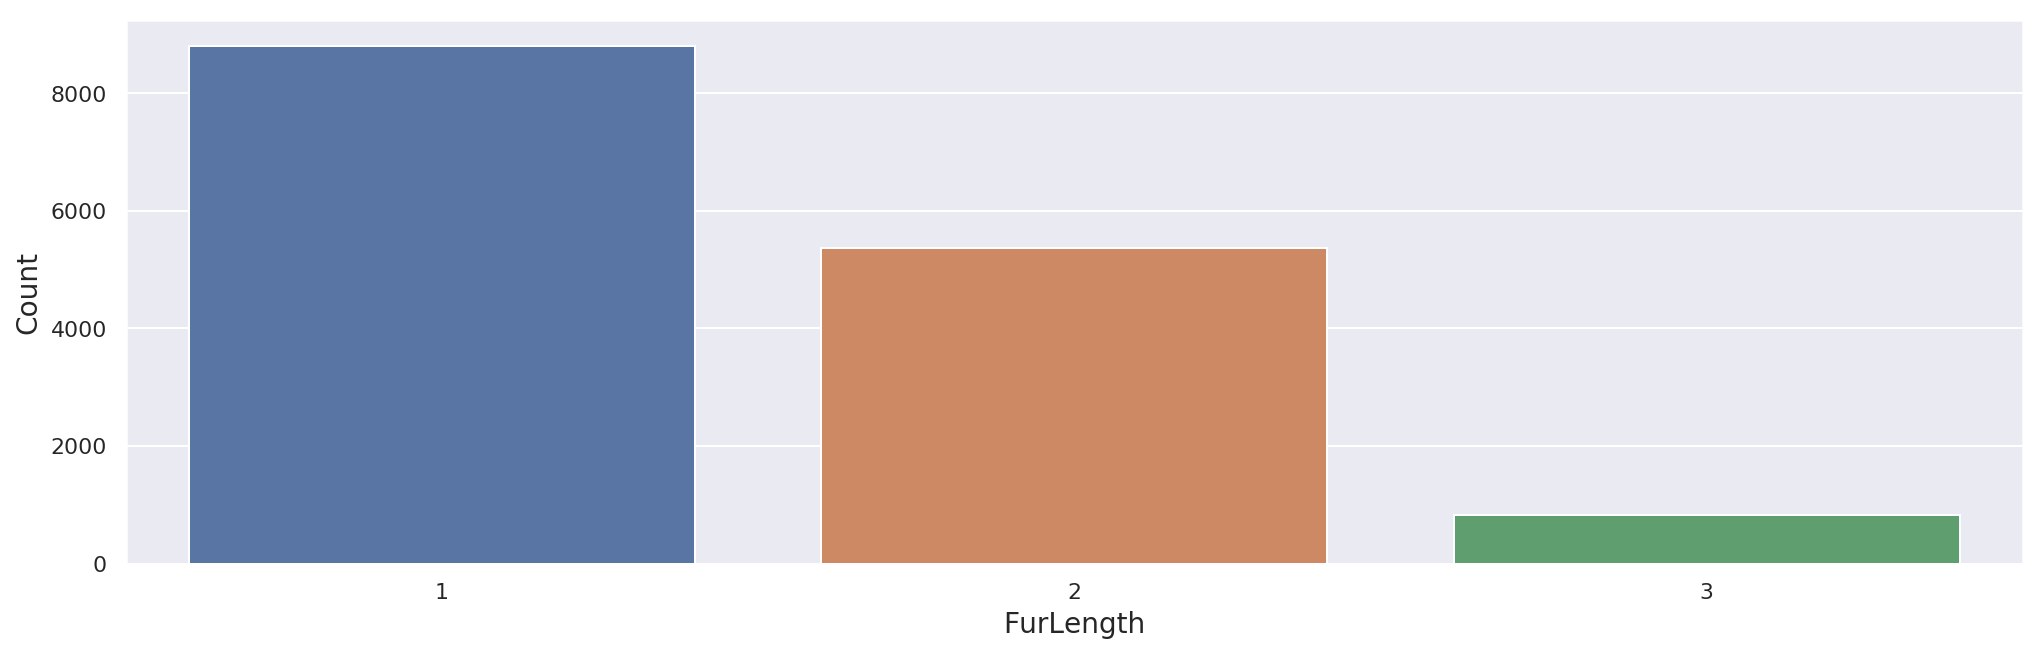

Total number of unique values for feature FurLength is 3
1    58.747415
2    35.756686
3     5.495898
Name: FurLength, dtype: float64
Univariate distribution of feature Vaccinated


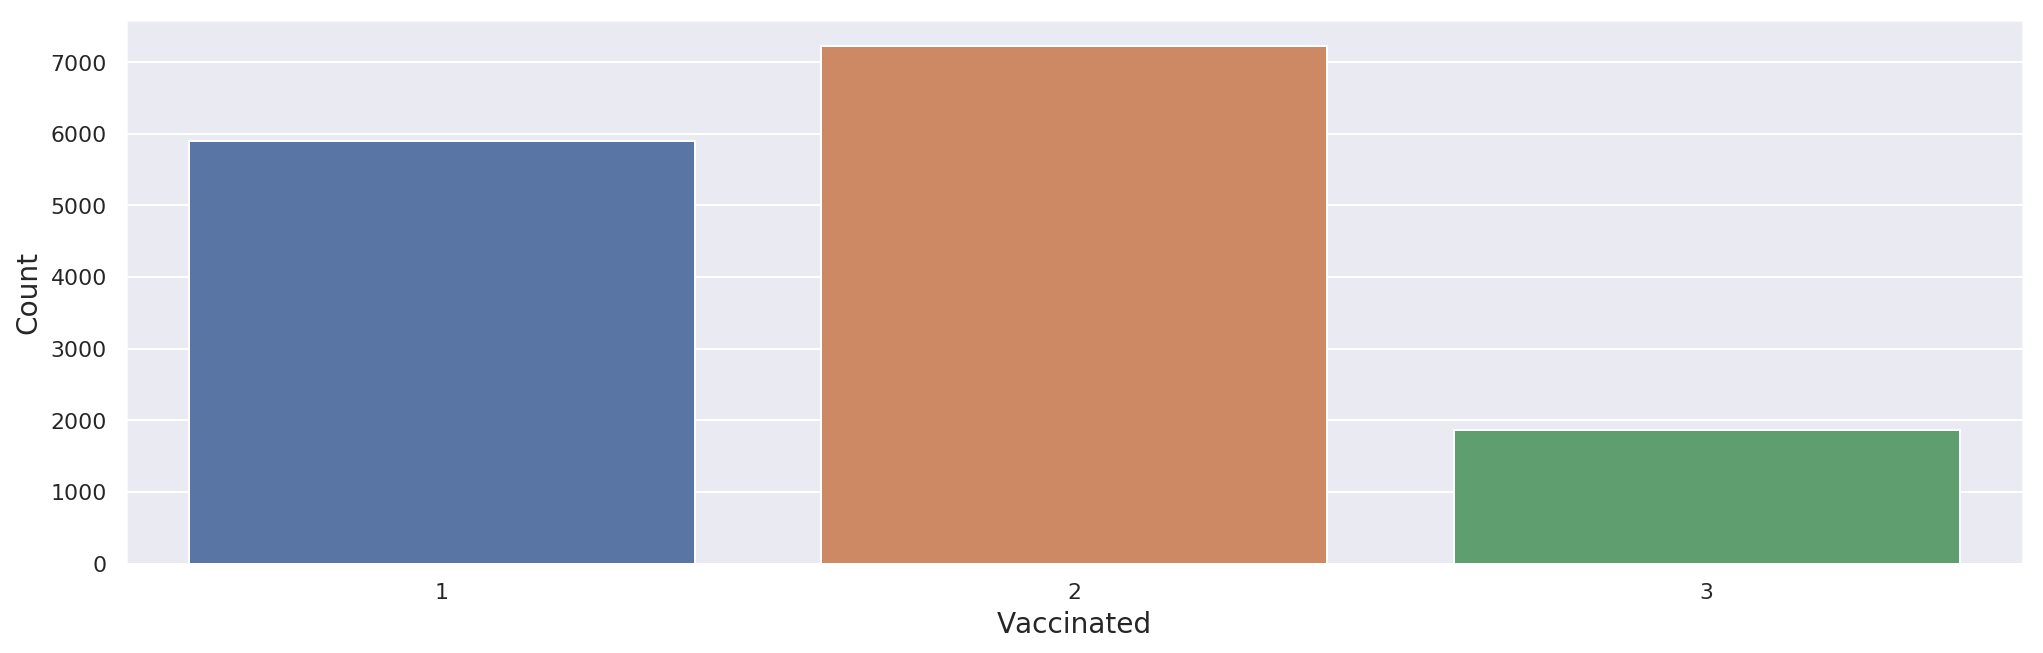

Total number of unique values for feature Vaccinated is 3
2    48.202494
1    39.338358
3    12.459148
Name: Vaccinated, dtype: float64
Univariate distribution of feature Dewormed


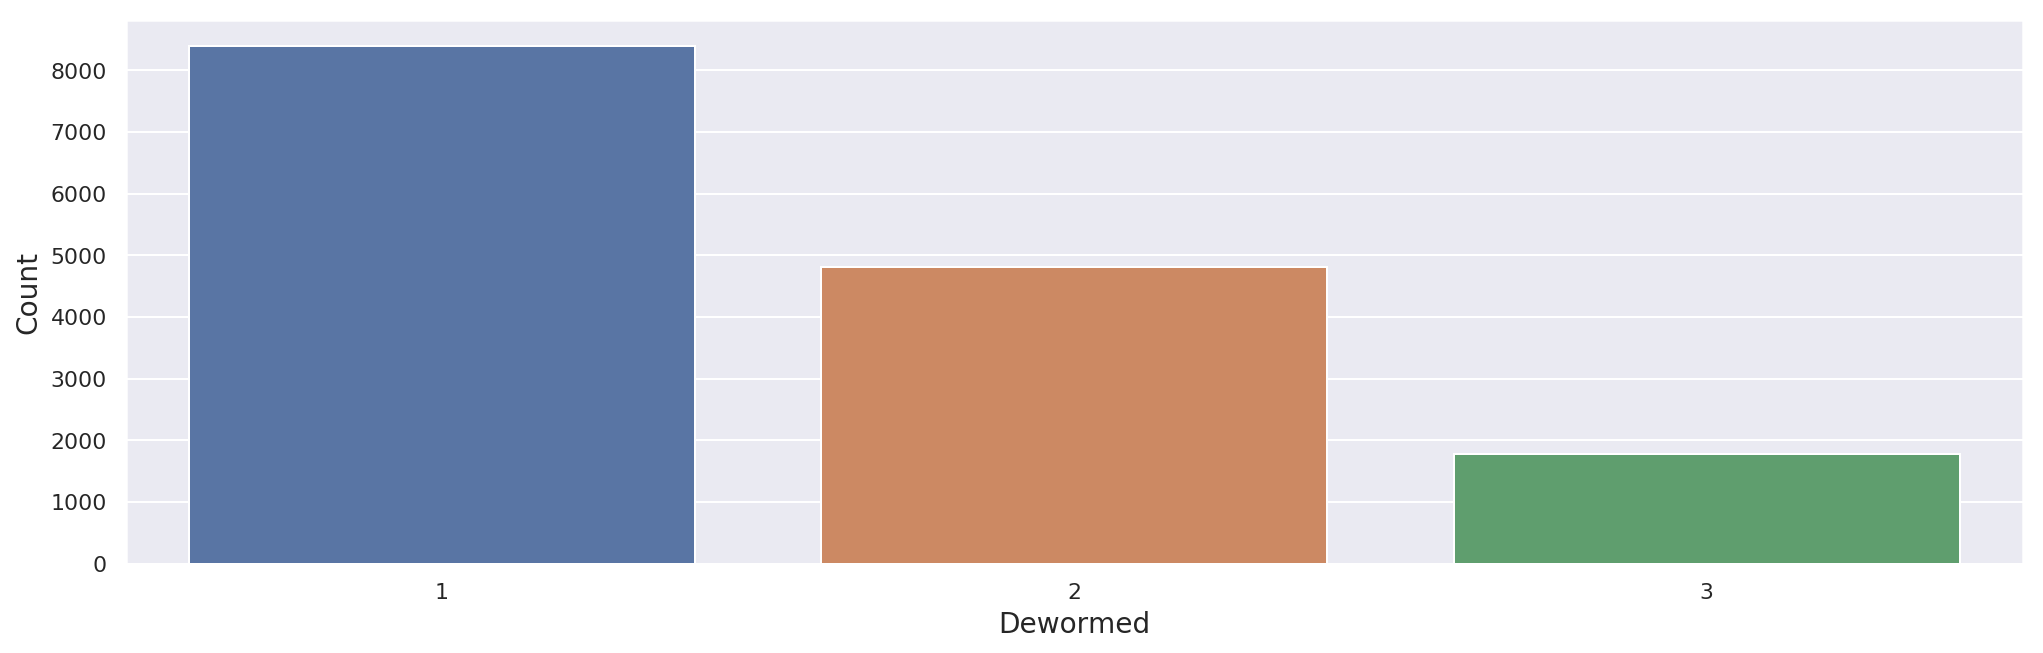

Total number of unique values for feature Dewormed is 3
1    56.006136
2    32.114987
3    11.878877
Name: Dewormed, dtype: float64
Univariate distribution of feature Sterilized


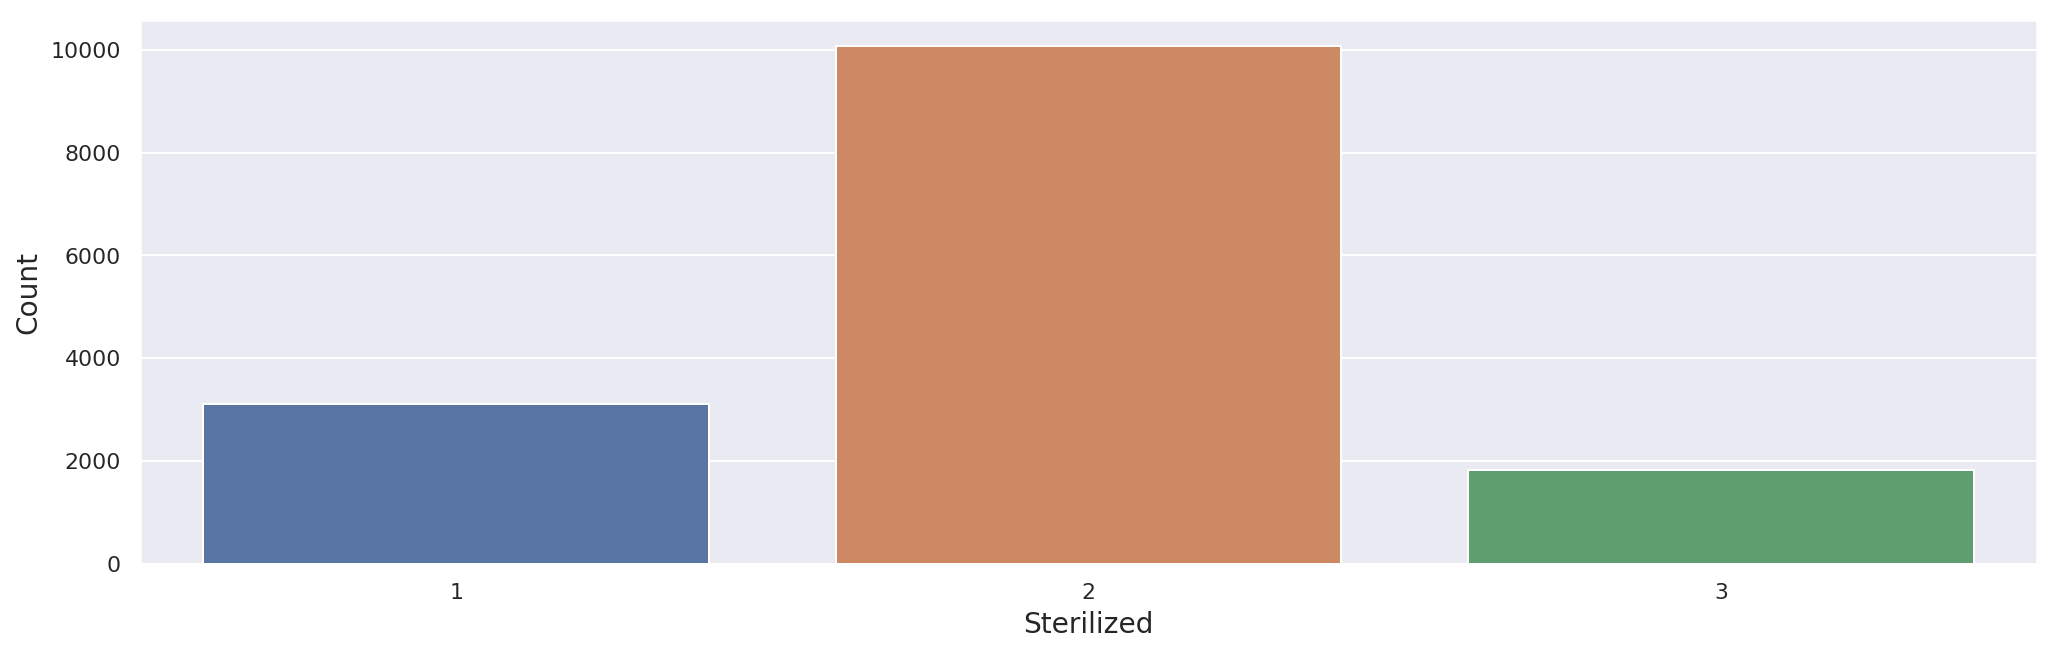

Total number of unique values for feature Sterilized is 3
2    67.211365
1    20.682985
3    12.105649
Name: Sterilized, dtype: float64
Univariate distribution of feature Health


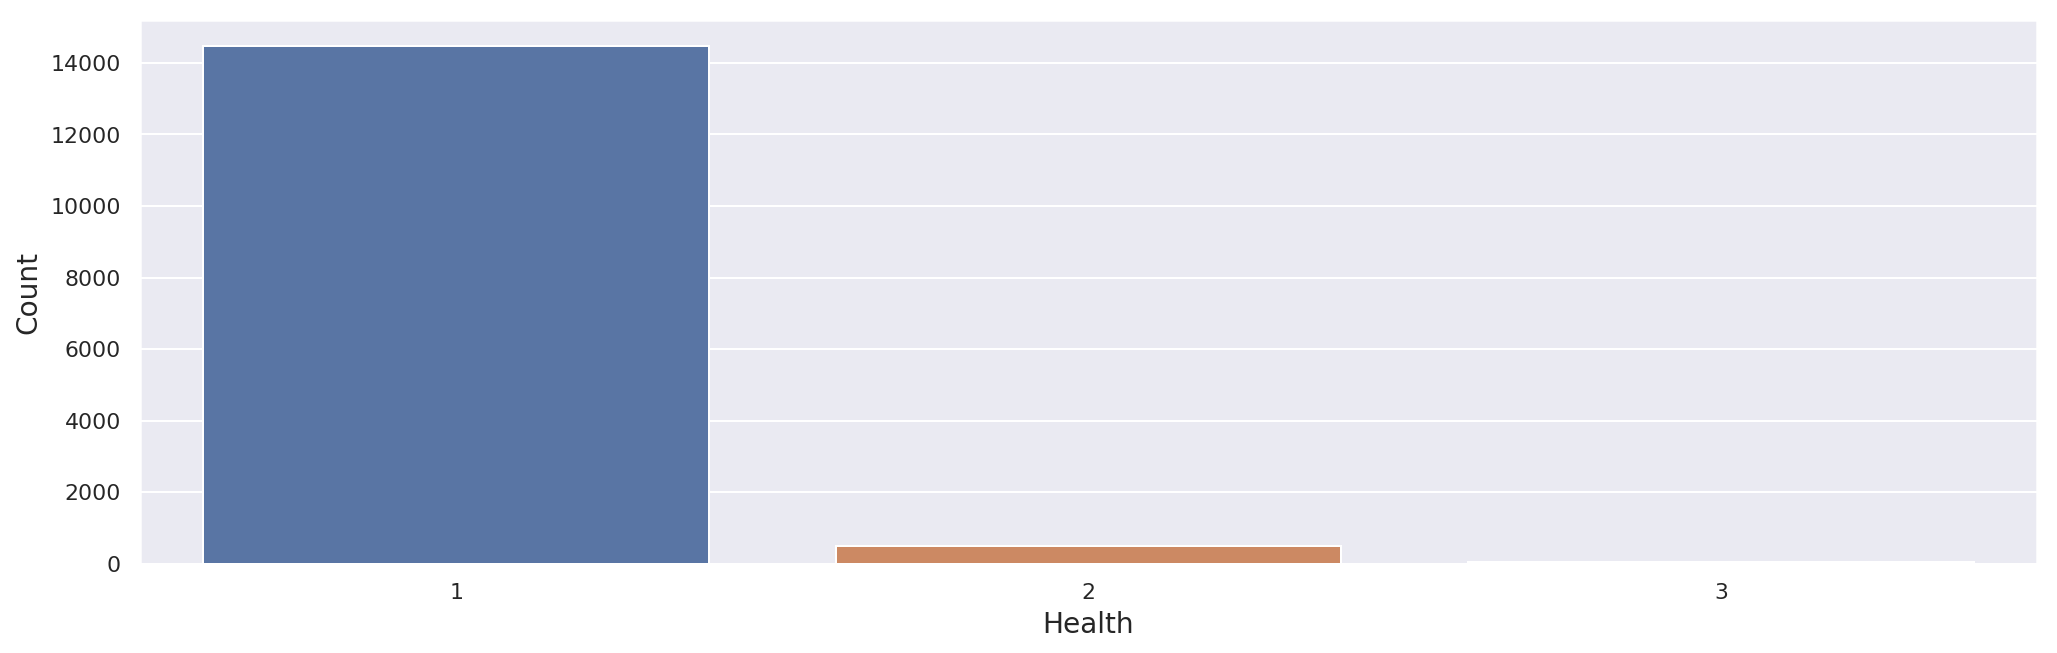

Total number of unique values for feature Health is 3
1    96.565064
2     3.208164
3     0.226772
Name: Health, dtype: float64
Univariate distribution of feature Quantity


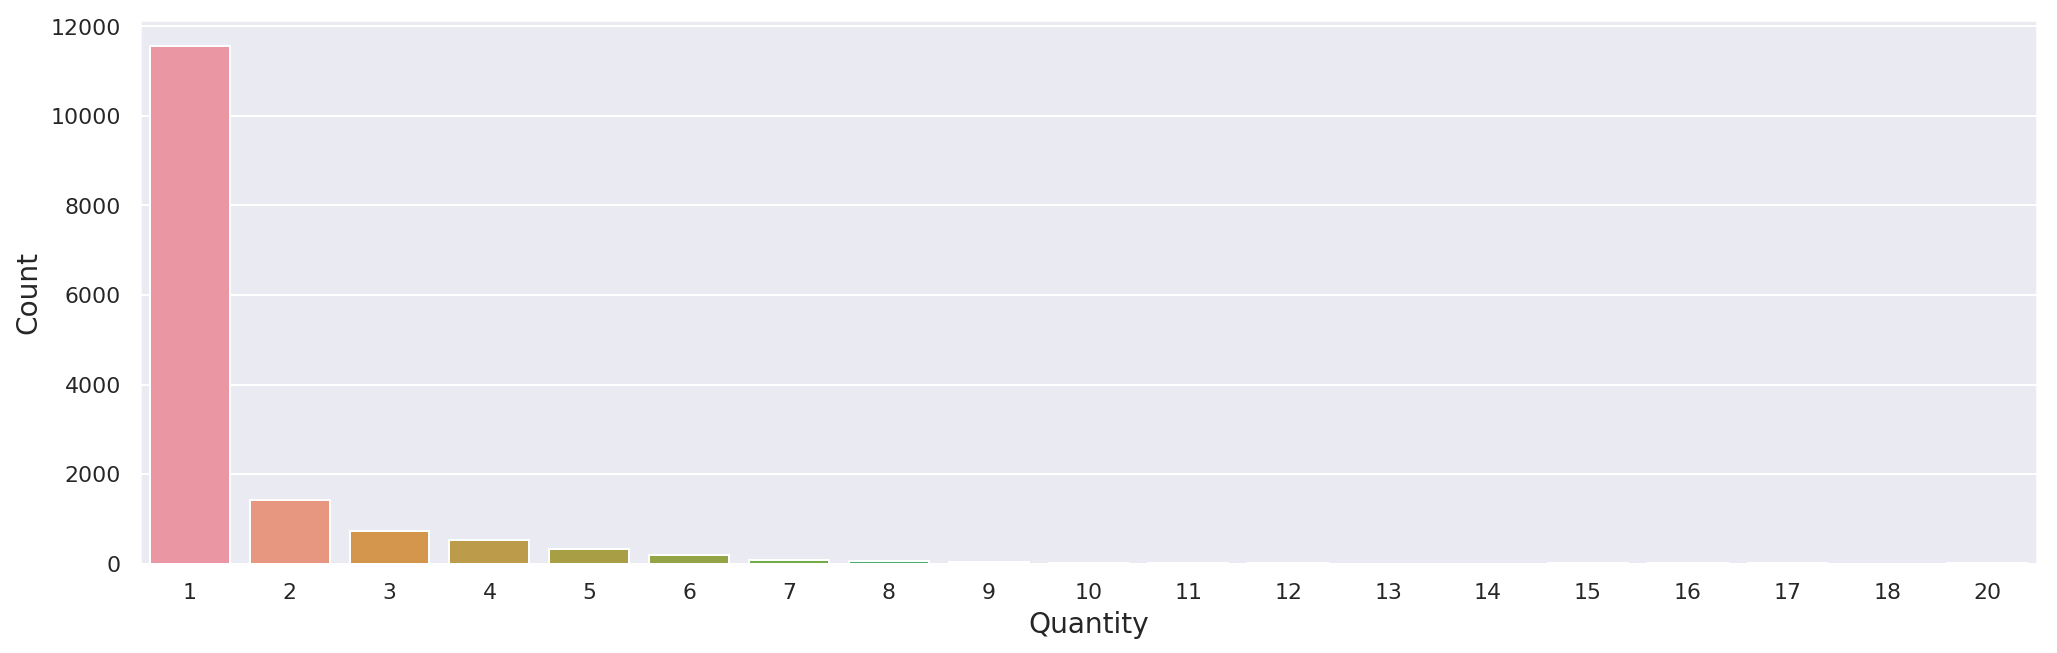

Total number of unique values for feature Quantity is 19
1     77.135997
2      9.484426
3      4.842260
4      3.541653
5      2.221036
6      1.233909
7      0.560261
8      0.346829
9      0.220103
10     0.126726
20     0.080037
11     0.066698
12     0.040019
15     0.026679
17     0.020009
16     0.020009
13     0.013340
14     0.013340
18     0.006670
Name: Quantity, dtype: float64
Univariate distribution of feature Fee


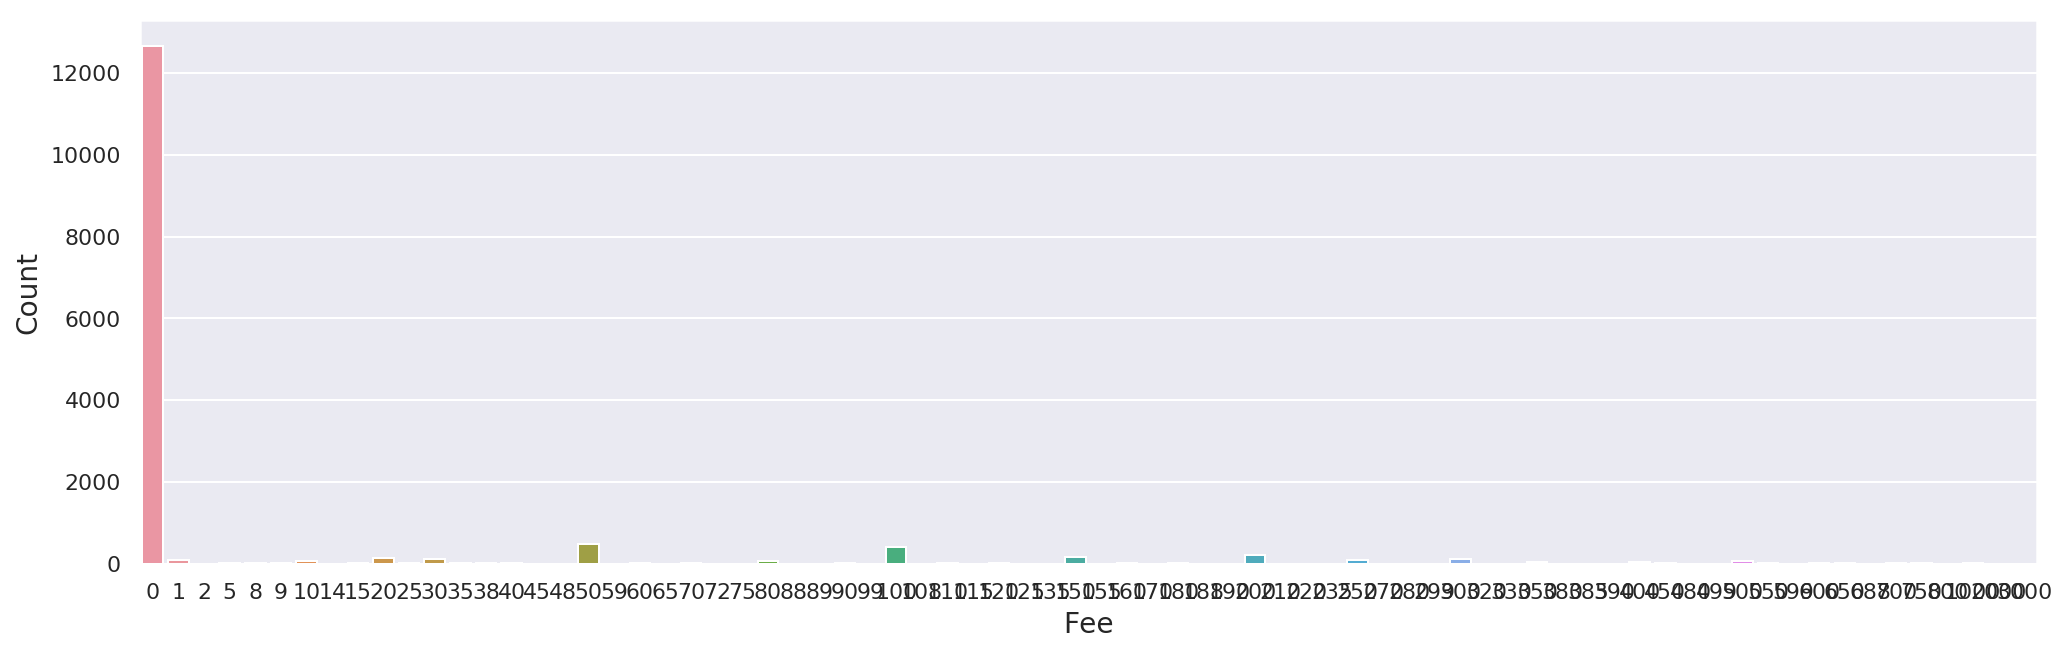

Total number of unique values for feature Fee is 74
0       84.459414
50       3.121457
100      2.721270
200      1.460682
150      1.080504
20       0.907090
300      0.800374
30       0.686987
250      0.613620
1        0.546922
10       0.466885
80       0.440205
500      0.373508
350      0.333489
400      0.200093
5        0.160075
15       0.133396
40       0.126726
120      0.126726
600      0.086707
70       0.086707
60       0.073368
450      0.073368
160      0.073368
180      0.066698
25       0.053358
90       0.053358
8        0.046688
750      0.046688
110      0.040019
9        0.033349
550      0.033349
700      0.033349
1000     0.026679
650      0.026679
38       0.026679
35       0.020009
390      0.013340
270      0.013340
800      0.013340
188      0.013340
59       0.013340
88       0.013340
155      0.013340
235      0.013340
380      0.013340
220      0.013340
45       0.013340
280      0.013340
65       0.013340
299      0.013340
135      0.006670
320      0.0

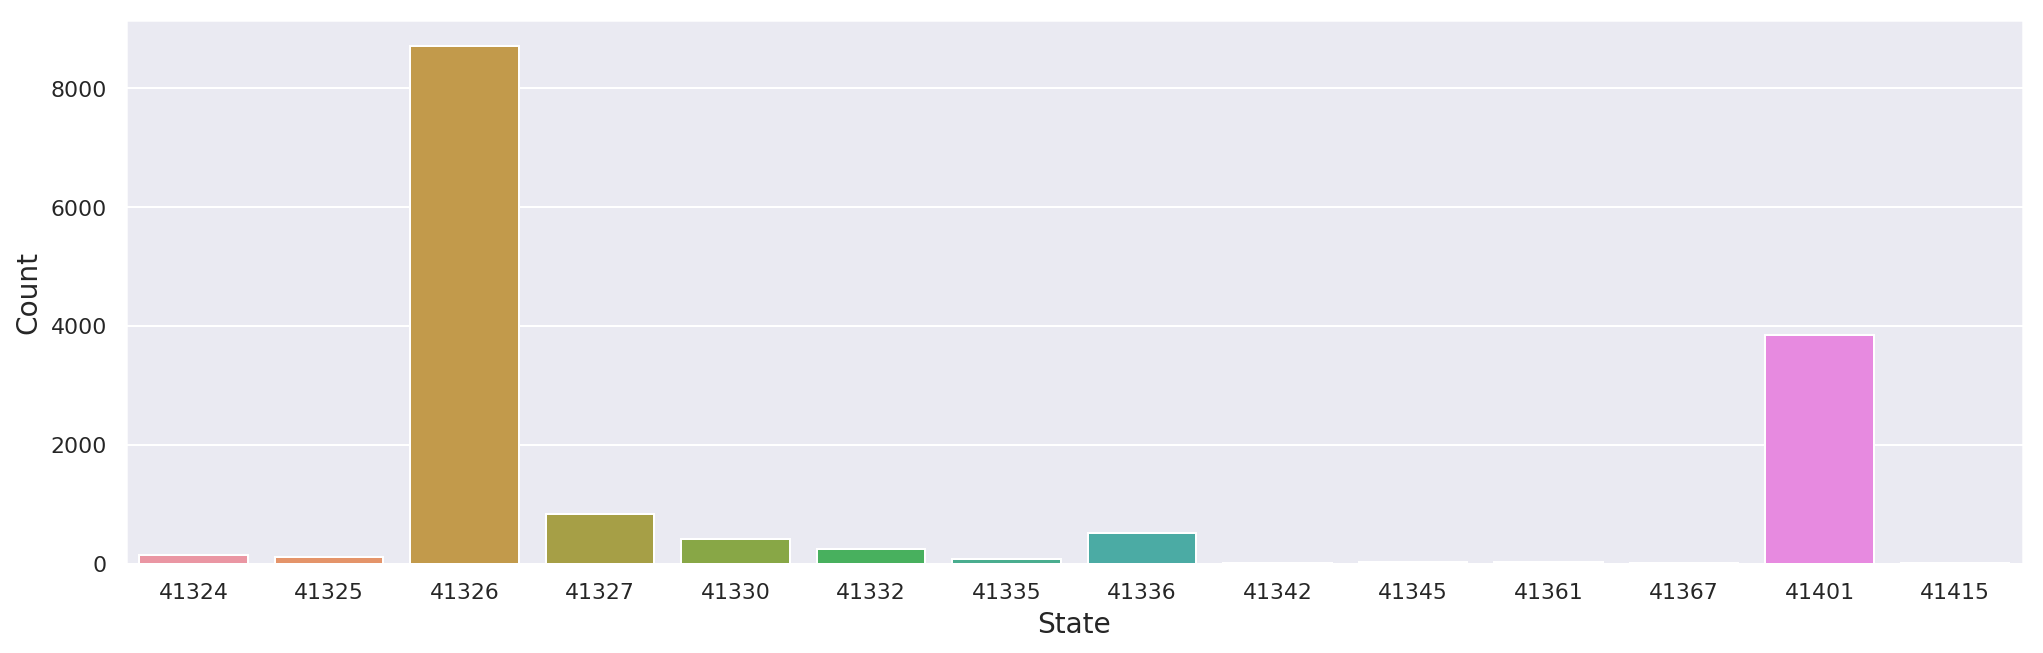

Total number of unique values for feature State is 14
41326    58.120456
41401    25.645301
41327     5.622624
41336     3.381578
41330     2.801307
41332     1.687454
41324     0.913760
41325     0.733676
41335     0.566931
41361     0.173414
41345     0.146735
41367     0.100047
41342     0.086707
41415     0.020009
Name: State, dtype: float64
Univariate distribution of feature VideoAmt


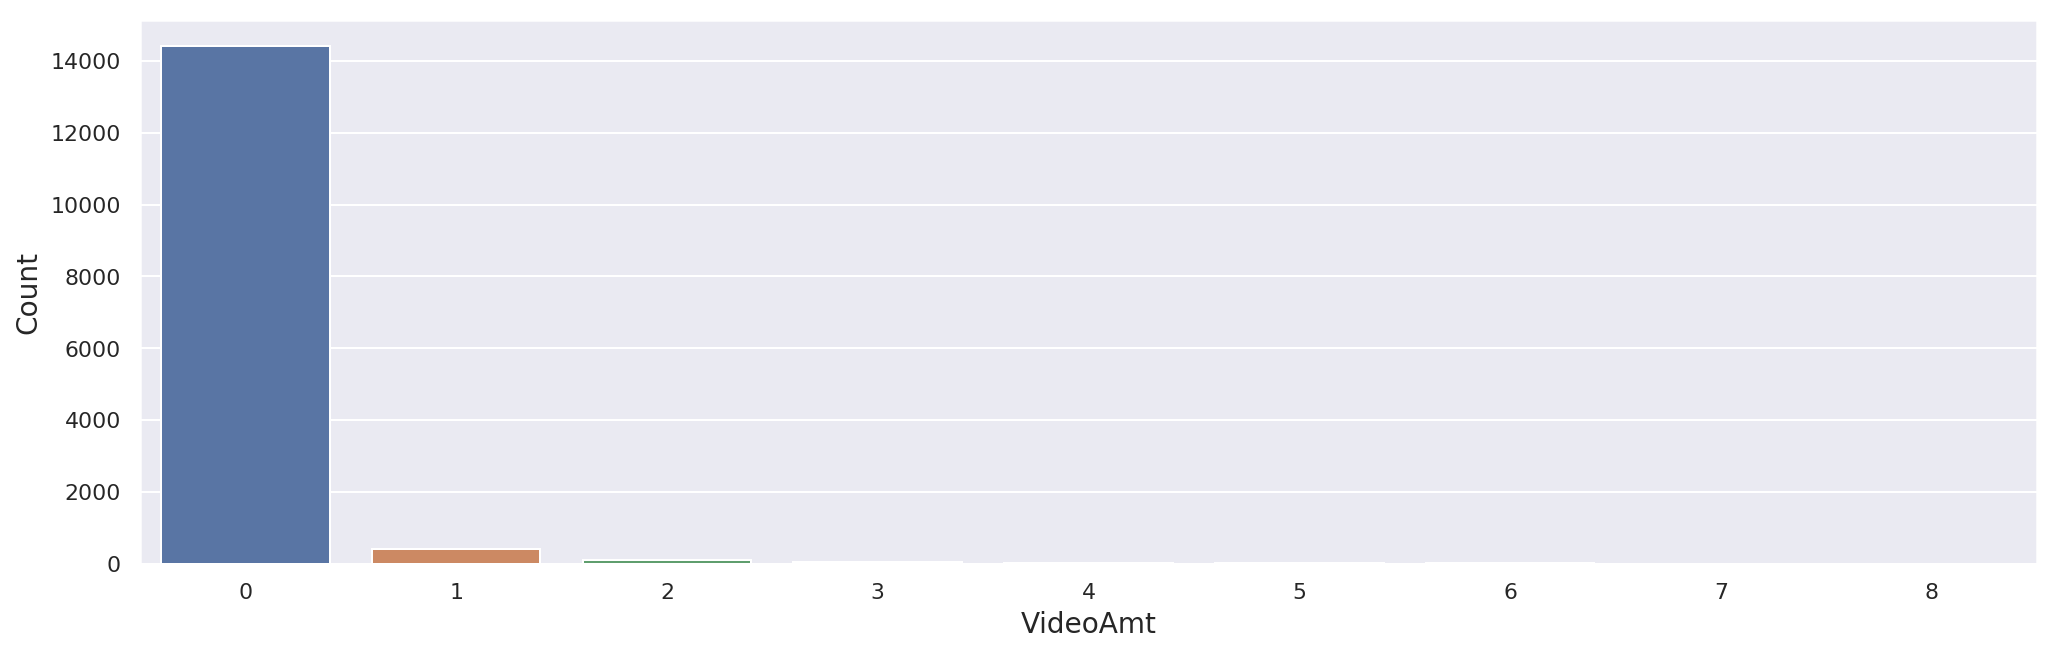

Total number of unique values for feature VideoAmt is 9
0    96.171547
1     2.781298
2     0.613620
3     0.240112
4     0.100047
5     0.046688
6     0.026679
8     0.013340
7     0.006670
Name: VideoAmt, dtype: float64
Univariate distribution of feature PhotoAmt


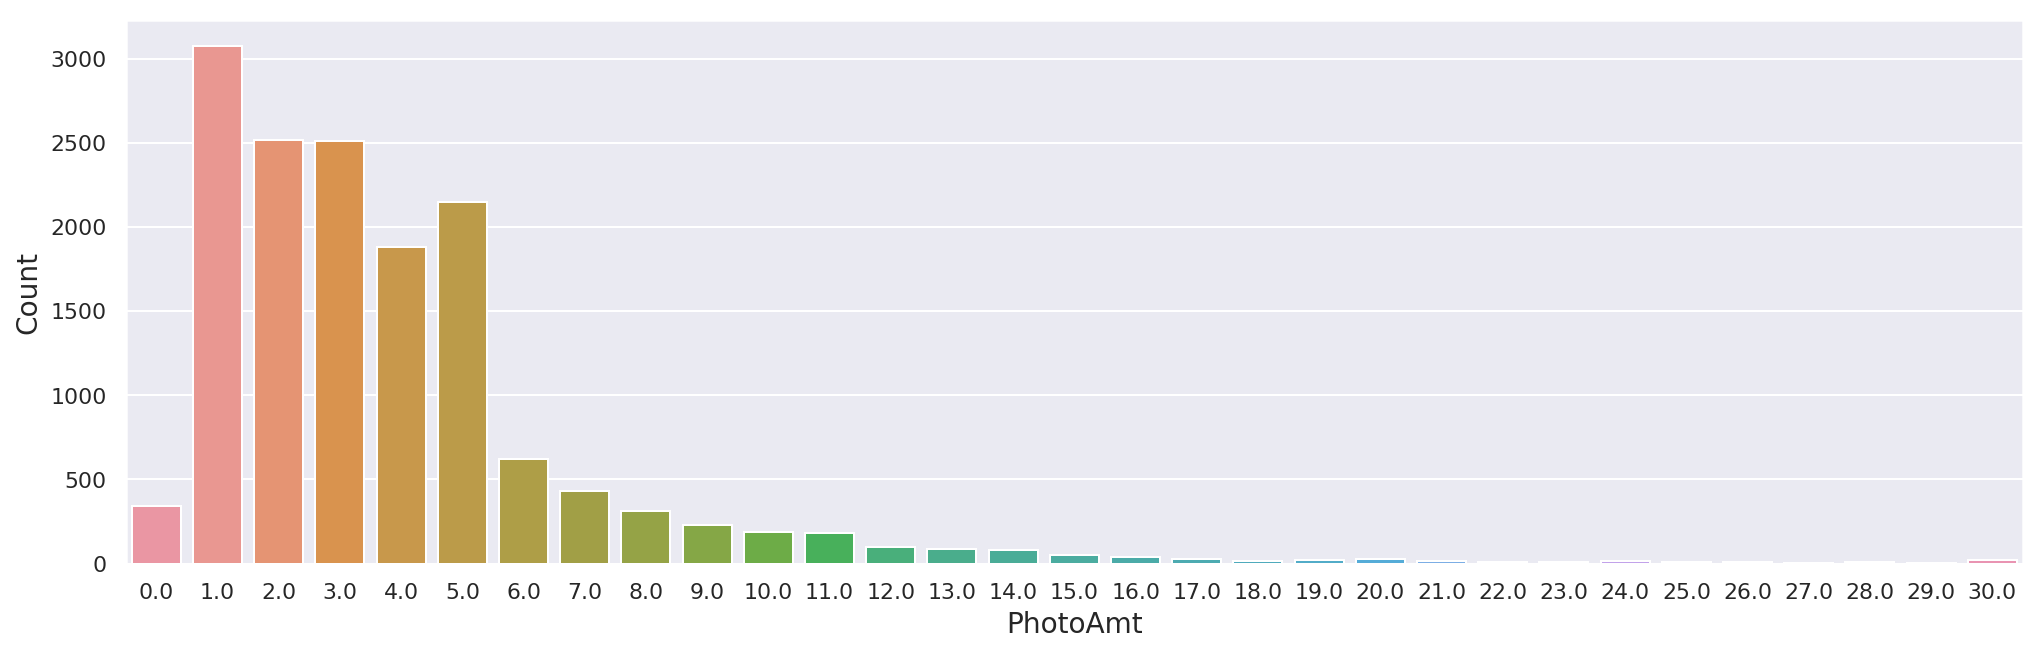

Total number of unique values for feature PhotoAmt is 31
1.0     20.509571
2.0     16.794504
3.0     16.747816
5.0     14.320016
4.0     12.545855
6.0      4.141933
7.0      2.881345
0.0      2.274395
8.0      2.094311
9.0      1.540719
10.0     1.267258
11.0     1.227239
12.0     0.646969
13.0     0.573601
14.0     0.520243
15.0     0.333489
16.0     0.260121
17.0     0.180084
20.0     0.166744
19.0     0.133396
30.0     0.126726
18.0     0.120056
21.0     0.106716
24.0     0.100047
23.0     0.080037
26.0     0.066698
22.0     0.060028
25.0     0.053358
28.0     0.046688
27.0     0.040019
29.0     0.040019
Name: PhotoAmt, dtype: float64
Univariate distribution of feature AdoptionSpeed


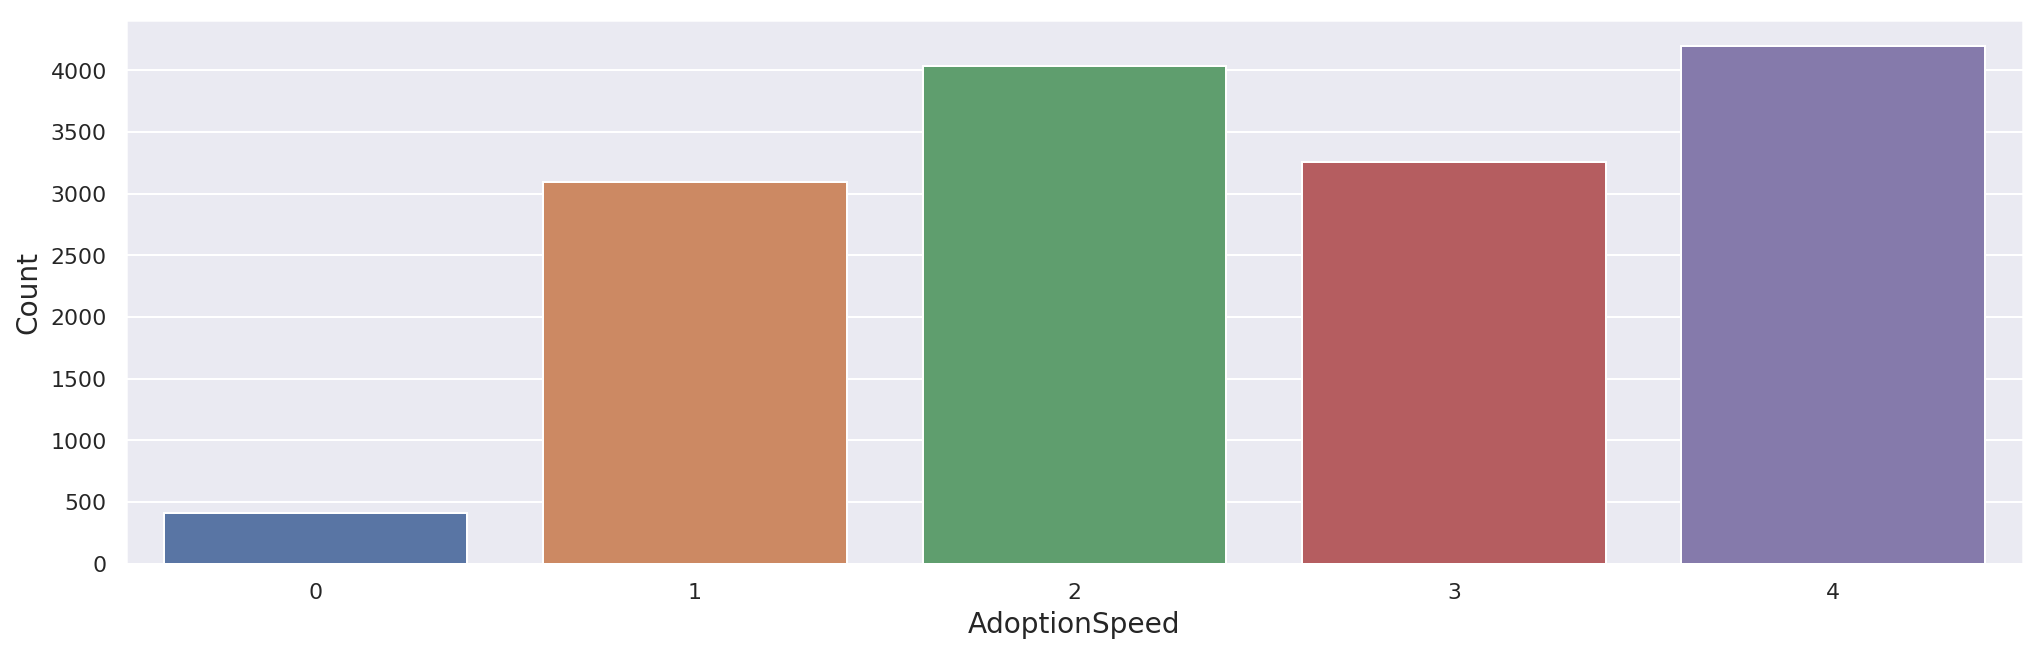

Total number of unique values for feature AdoptionSpeed is 5
4    27.993063
2    26.925899
3    21.736811
1    20.609618
0     2.734609
Name: AdoptionSpeed, dtype: float64


In [34]:
for feat in feats:
    print(f"Univariate distribution of feature {feat}")
    plot_distribution(df_train, feat)

 ## Bivariate with target

In [ ]:
for cat_c in feats:
    if cat_c == "AdoptionSpeed": continue
    nunique = df_train[cat_c].nunique()
    print(f'{cat_c}:')
    print(f'{nunique} unique values')
    if nunique < 50:
        print(f'\nValues:\n{100 * df_train[cat_c].value_counts(normalize=True, dropna=False)}')
      
        # Countplot
        fig, ax = plt.subplots(figsize=(12,4))
        sns.countplot(x=cat_c, hue="AdoptionSpeed", data=df_train, orient="h")
        #ax.text(5,5,"Boxplot After removing outliers", fontsize=18, color="r", ha="center", va="center")
        ax.xaxis.set_label_text(cat_c,fontdict= {'size':14})
        ax.yaxis.set_label_text("Count",fontdict= {'size':14})
        plt.xticks(rotation=90)
        plt.show()
    else:
        # Distplot to see the distribution after outliers have been removed
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(12,4))
        for aspeed in range(5):
            sns.distplot(df_train[df_train.AdoptionSpeed == aspeed][cat_c].dropna(), hist=False, rug=False, label="AdoptionSpeed = {}".format(aspeed))
        ax.xaxis.set_label_text(cat_c,fontdict= {'size':14})
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

TO-DO: same approach but normalizing by AdoptionSpeed frequency

## Bivariate between correlated variables

In [ ]:
c = df_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so = pd.DataFrame(so[20:]).reset_index()
so.columns = ["var1", "var2", "corr"]
so = so[so["corr"] > 0.3]
so

In [ ]:

for k, v in so.iterrows():
    print(f'{v["var1"]} vs {v["var2"]} ({v["corr"]})')
    if (df_train[v["var1"]].nunique() < 50) and (df_train[v["var2"]].nunique() < 50):
        fig, ax = plt.subplots(figsize=(12,4))
        sns.countplot(x=v["var1"], hue=v["var2"], data=df_train, orient="h")
        #ax.text(5,5,"Boxplot After removing outliers", fontsize=18, color="r", ha="center", va="center")
        ax.xaxis.set_label_text(v["var1"], fontdict= {'size':14})
        ax.yaxis.set_label_text("Count",fontdict= {'size':14})
        plt.xticks(rotation=90)
        plt.show()
    else:
        # Distplot to see the distribution after outliers have been removed
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(12,4))
        sns.scatterplot(x=v["var1"], y=v["var2"], data=df_train, hue="AdoptionSpeed")
        ax.xaxis.set_label_text(v["var1"], fontdict= {'size':14})
        #plt.xticks(rotation=90)
        plt.show()

# Base model

In [ ]:
import numpy as np
import pandas as pd
import os
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import scipy as sp
from sklearn import linear_model
from functools import partial
from sklearn.metrics import cohen_kappa_score, mean_squared_error
from sklearn.metrics import confusion_matrix as sk_cmatrix
from collections import Counter
import json
import lightgbm as lgb

In [ ]:
# The following 3 functions have been taken from Ben Hamner's github repository
# https://github.com/benhamner/Metrics
def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat


def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings


def quadratic_weighted_kappa(y, y_pred):
    """
    Calculates the quadratic weighted kappa
    axquadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = y
    rater_b = y_pred
    min_rating=None
    max_rating=None
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return (1.0 - numerator / denominator)

In [ ]:
class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0

    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4

        ll = quadratic_weighted_kappa(y, X_p)
        return -ll

    def fit(self, X, y):
        loss_partial = partial(self._kappa_loss, X=X, y=y)
        initial_coef = [0.5, 1.5, 2.5, 3.5]
        self.coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')

    def predict(self, X, coef):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4
        return X_p

    def coefficients(self):
        return self.coef_['x']

In [ ]:
def rmse(actual, predicted):
    return mean_squared_error(actual, predicted)**0.5

In [ ]:
train_desc = df_train.Description.fillna("none").values
test_desc = df_test.Description.fillna("none").values

tfv = TfidfVectorizer(min_df=3,  max_features=None,
        strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
        ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
        stop_words = 'english')
    
# Fit TFIDF
tfv.fit(list(train_desc) + list(test_desc))
X =  tfv.transform(train_desc)
X_test = tfv.transform(test_desc)


svd = TruncatedSVD(n_components=180)
svd.fit(X)
X = svd.transform(X)

X_test = svd.transform(X_test)

In [ ]:
train_desc = df_train.Description.fillna("none").values
test_desc = df_test.Description.fillna("none").values

svd_n_components = 200

tfv = TfidfVectorizer(min_df=2,  max_features=None,
        strip_accents='unicode', analyzer='word', token_pattern=r'(?u)\b\w+\b',
        ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
        )
    
# Fit TFIDF
tfv.fit(list(train_desc))
X =  tfv.transform(train_desc)
X_test = tfv.transform(test_desc)

svd = TruncatedSVD(n_components=svd_n_components)
svd.fit(X)
print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)
X = svd.transform(X)
X = pd.DataFrame(X, columns=['svd_{}'.format(i) for i in range(svd_n_components)])
df_train = pd.concat((df_train, X), axis=1)
X_test = svd.transform(X_test)
X_test = pd.DataFrame(X_test, columns=['svd_{}'.format(i) for i in range(svd_n_components)])
df_test = pd.concat((df_test, X_test), axis=1)

In [ ]:
# Thanks to beloruk1

def readFile(fn):
    file = '../input/train_sentiment/'+fn['PetID']+'.json'
    if os.path.exists(file):
        with open(file) as data_file:    
            data = json.load(data_file)  

        df = json_normalize(data)
        mag = df['documentSentiment.magnitude'].values[0]
        score = df['documentSentiment.score'].values[0]
        return pd.Series([mag,score],index=['mag','score']) 
    else:
        return pd.Series([0,0],index=['mag','score'])
    
def readTestFile(fn):
    file = '../input/test_sentiment/' + fn['PetID'] + '.json'
    if os.path.exists(file):
        with open(file) as data_file:    
            data = json.load(data_file)  

        df = json_normalize(data)
        mag = df['documentSentiment.magnitude'].values[0]
        score = df['documentSentiment.score'].values[0]
        return pd.Series([mag,score],index=['mag','score']) 
    else:
        print(f'{file} does not exist')
        return pd.Series([0,0],index=['mag','score'])
    
df_train[['SentMagnitude', 'SentScore']] = df_train[['PetID']].apply(lambda x: readFile(x), axis=1)
df_test[['SentMagnitude', 'SentScore']] = df_test[['PetID']].apply(lambda x: readTestFile(x), axis=1)

In [ ]:
# Not needed, as there's no overlap between RescuerID in train set and test set
#lbl_enc = LabelEncoder()
#lbl_enc.fit(df_train.RescuerID.values.tolist() + df_test.RescuerID.values.tolist())
#df_train.RescuerID = lbl_enc.transform(df_train.RescuerID.values)
#df_test.RescuerID = lbl_enc.transform(df_test.RescuerID.values)

Features

Columns

In [ ]:
y = df_train.AdoptionSpeed
train = np.hstack((df_train.drop(['Name', 'Description', 'PetID', 'AdoptionSpeed', 'RescuerID'], axis=1).values, X))
test = np.hstack((df_test.drop(['Name', 'Description', 'PetID', 'RescuerID'], axis=1).values, X_test))

In [ ]:
df_train.columns.ravel()

In [ ]:
target = df_train['AdoptionSpeed']
train_id = df_train['PetID']
test_id = df_test['PetID']
df_train.drop(['Name', 'Description', 'PetID', 'AdoptionSpeed', 'RescuerID'], axis=1, inplace=True, errors='ignore')
df_test.drop(['Name', 'Description', 'PetID', 'RescuerID'], axis=1, inplace=True, errors='ignore')

In [ ]:
def run_cv_model(train, test, target, model_fn, params={}, eval_fn=None, label='model'):
    kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    fold_splits = kf.split(train, target)
    cv_scores = []
    qwk_scores = []
    pred_full_test = 0
    pred_train = np.zeros((train.shape[0], 5))
    all_coefficients = np.zeros((5, 4))
    feature_importance_df = pd.DataFrame()
    i = 1
    for dev_index, val_index in fold_splits:
        print('Started ' + label + ' fold ' + str(i) + '/5')
        if isinstance(train, pd.DataFrame):
            dev_X, val_X = train.iloc[dev_index], train.iloc[val_index]
            dev_y, val_y = target[dev_index], target[val_index]
        else:
            dev_X, val_X = train[dev_index], train[val_index]
            dev_y, val_y = target[dev_index], target[val_index]
        params2 = params.copy()
        pred_val_y, pred_test_y, importances, coefficients, qwk = model_fn(dev_X, dev_y, val_X, val_y, test, params2)
        pred_full_test = pred_full_test + pred_test_y
        pred_train[val_index] = pred_val_y
        all_coefficients[i-1, :] = coefficients
        if eval_fn is not None:
            cv_score = eval_fn(val_y, pred_val_y)
            cv_scores.append(cv_score)
            qwk_scores.append(qwk)
            print(label + ' cv score {}: RMSE {} QWK {}'.format(i, cv_score, qwk))
        fold_importance_df = pd.DataFrame()
        fold_importance_df['feature'] = train.columns.values
        fold_importance_df['importance'] = importances
        fold_importance_df['fold'] = i
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)        
        i += 1
    print('{} cv RMSE scores : {}'.format(label, cv_scores))
    print('{} cv mean RMSE score : {}'.format(label, np.mean(cv_scores)))
    print('{} cv std RMSE score : {}'.format(label, np.mean(cv_scores)))
    print('{} cv QWK scores : {}'.format(label, qwk_scores))
    print('{} cv mean QWK score : {}'.format(label, np.mean(qwk_scores)))
    print('{} cv std QWK score : {}'.format(label, np.std(qwk_scores)))
    pred_full_test = pred_full_test / 5.0
    results = {'label': label,
               'train': pred_train, 'test': pred_full_test,
                'cv': cv_scores, 'qwk': qwk_scores,
               'importance': feature_importance_df,
               'coefficients': all_coefficients}
    return results

params = {'application': 'regression',
          'boosting': 'gbdt',
          'metric': 'rmse',
          'num_leaves': 80,
          'max_depth': 9,
          'learning_rate': 0.01,
          'bagging_fraction': 0.85,
          'feature_fraction': 0.8,
          'min_split_gain': 0.01,
          'min_child_samples': 150,
          'min_child_weight': 0.1,
          'verbosity': -1,
          'data_random_seed': 3,
          'early_stop': 100,
          'verbose_eval': 100,
          'num_rounds': 10000}

def runLGB(train_X, train_y, test_X, test_y, test_X2, params):
    print('Prep LGB')
    d_train = lgb.Dataset(train_X, label=train_y)
    d_valid = lgb.Dataset(test_X, label=test_y)
    watchlist = [d_train, d_valid]
    print('Train LGB')
    num_rounds = params.pop('num_rounds')
    verbose_eval = params.pop('verbose_eval')
    early_stop = None
    if params.get('early_stop'):
        early_stop = params.pop('early_stop')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop)
    print('Predict 1/2')
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    optR = OptimizedRounder()
    optR.fit(pred_test_y, test_y)
    coefficients = optR.coefficients()
    pred_test_y_k = optR.predict(pred_test_y, coefficients)
    print("Valid Counts = ", Counter(test_y))
    print("Predicted Counts = ", Counter(pred_test_y_k))
    print("Coefficients = ", coefficients)
    qwk = quadratic_weighted_kappa(test_y, pred_test_y_k)
    print("QWK = ", qwk)
    print('Predict 2/2')
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)
    return pred_test_y.reshape(-1, 1), pred_test_y2.reshape(-1, 1), model.feature_importance(), coefficients, qwk

results = run_cv_model(df_train, df_test, target, runLGB, params, rmse, 'lgb')

In [ ]:
imports = results['importance'].groupby('feature')['feature', 'importance'].mean().reset_index()
imports.sort_values('importance', ascending=False)

Surprisingly, model considers of least importance the fact that the pet has ben dewormed, spayed / neutered, vaccinated. Gender is also not an important factor in this model. On the other hand, breed, number of photos, location, age and amount of pets to be adopted at once are the most important factors.

I still want to explore many things:
1. Reduce the amount of components in the SVD model
2. Play with images. I will try to share with you a kernel where I validate the following hypothesis: visually similar pets / images have similar adoption speed
3. Compare more single models: CATboost (of course :P), XGBoost, RF, etc
4. ...

Now, let's adjust the coefficients to optimize the Quadratic Weighted Kappa

In [ ]:
optR = OptimizedRounder()
coefficients_ = np.mean(results['coefficients'], axis=0)
print(coefficients_)
train_predictions = [r[0] for r in results['train']]
train_predictions = optR.predict(train_predictions, coefficients_).astype(int)
Counter(train_predictions)

In [ ]:
optR = OptimizedRounder()
test_predictions = [r[0] for r in results['test']]
test_predictions = optR.predict(test_predictions, coefficients_).astype(int)
Counter(test_predictions)

In [ ]:
pd.DataFrame(sk_cmatrix(target, train_predictions), index=list(range(5)), columns=list(range(5)))

In [ ]:
quadratic_weighted_kappa(target, train_predictions)


In [ ]:
rmse(target, [r[0] for r in results['train']])


# Submission

In [ ]:
submission = pd.DataFrame({'PetID': test_id, 'AdoptionSpeed': test_predictions})
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)